# **Data Crawling - Preprocessing**

## **Install & Import Libary**

In [3]:
!pip install kagglehub
!pip install imbalanced-learn


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import os
import ast
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, learning_curve, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay

c:\Users\deeka\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Download latest version
path = kagglehub.dataset_download("nikhil1e9/loan-default")

# Check the files in the downloaded path
print("Files in dataset directory:", os.listdir(path))

Files in dataset directory: ['Loan_default.csv']


In [3]:
# get path dataset and convert to variabel "df"
data_path = os.path.join(path, 'Loan_default.csv')
df = pd.read_csv(data_path)

## **EDA (Exploratory Data Analysis)**

In [4]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [5]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

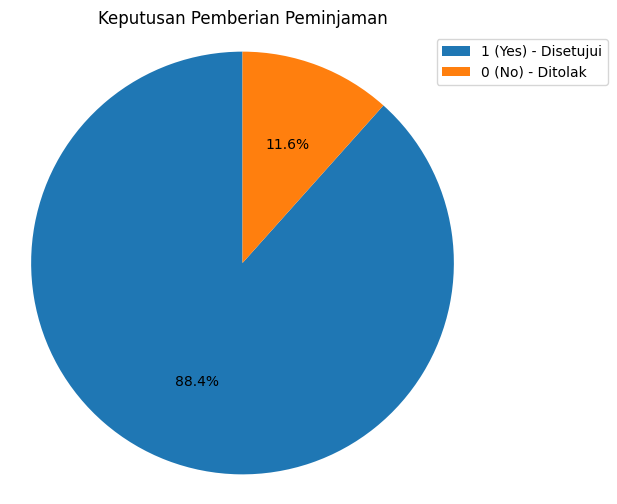

In [7]:
# Data
loan = df['Default'].value_counts()

labels = ['1 (Yes) - Disetujui', '0 (No) - Ditolak']

# Pie chart
plt.figure(figsize=(6, 6))
# colors = ['lightblue','orange']  # Warna untuk kategori
plt.pie(loan, labels=None, autopct='%1.1f%%', startangle=90, )
plt.title('Keputusan Pemberian Peminjaman')
plt.axis('equal')  # Agar pie chart berbentuk lingkaran

# Tambahkan legenda di pojok kanan atas
plt.legend(labels, loc="upper right", bbox_to_anchor=(1.3, 1))  # Posisikan legenda di luar chart

# Tampilkan chart
plt.show()

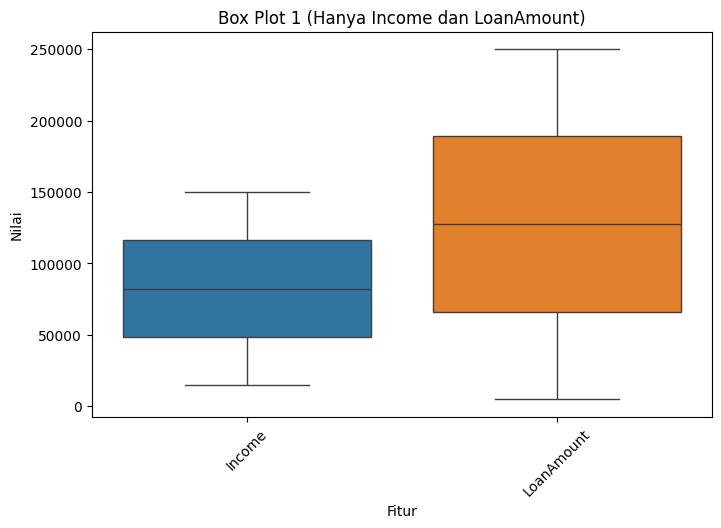

In [8]:
# Pilih dua kolom yang ingin diplot
columns_to_plot = ['Income','LoanAmount']
data_selected = df[columns_to_plot]

# Plot box plot untuk kedua kolom tersebut
plt.figure(figsize=(8, 5))
sns.boxplot(data=data_selected)
plt.title('Box Plot 1 (Hanya Income dan LoanAmount)')
plt.xlabel('Fitur')
plt.ylabel('Nilai')
plt.xticks(rotation=45)
plt.show()

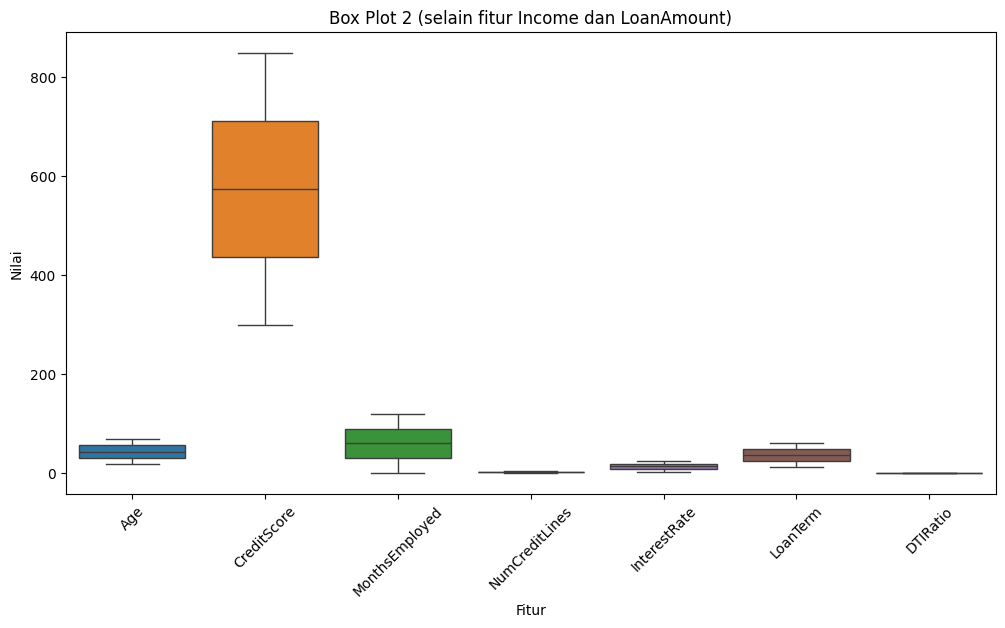

In [9]:
columns_to_drop = ['Default','Income','LoanAmount']
data_features = df.drop(columns=columns_to_drop, axis=1)

# Plot box plot untuk setiap kolom tersisa
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_features)
plt.title('Box Plot 2 (selain fitur Income dan LoanAmount)')
plt.xlabel('Fitur')
plt.ylabel('Nilai')
plt.xticks(rotation=45)
plt.show()

# **Siklus 1 (Modeling without SMOTE)**

In [4]:
# drop kolom yang tidak berhubungan dengan proses klasifikasi
columns = ['LoanID']
df.drop(columns, inplace=True, axis=1)

In [5]:
# Inisialisasi LabelEncoder
le = LabelEncoder()

# Mencari semua kolom yang bertipe object
columns_to_encode = df.select_dtypes(include=['object']).columns

# Loop untuk encode setiap kolom bertipe object
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

# Menampilkan hasil
print("Kolom yang di-encode:\n", columns_to_encode.tolist())
df.head()

Kolom yang di-encode:
 ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  int32  
 10  EmploymentType  255347 non-null  int32  
 11  MaritalStatus   255347 non-null  int32  
 12  HasMortgage     255347 non-null  int32  
 13  HasDependents   255347 non-null  int32  
 14  LoanPurpose     255347 non-null  int32  
 15  HasCoSigner     255347 non-null  int32  
 16  Default         255347 non-null  int64  
dtypes: float64

In [8]:
df.isna().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [9]:
# Checking Duplicate
df_duplikat_check = df.duplicated().sum()
print(f"Jumlah baris yang terdeteksi duplikat: {df_duplikat_check}")

Jumlah baris yang terdeteksi duplikat: 0


In [10]:
# Pisahkan fitur dan target dari dataset
X = df.drop(columns=['Default'])  # Fitur-fitur
y = df['Default']  # Target

print(X.shape)
print(y.shape)

(255347, 16)
(255347,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(204277, 16)
(204277,)
(51070, 16)
(51070,)


In [12]:
# Inisialisasi model Decision Tree
model = DecisionTreeClassifier()
    
# Train model
model.fit(X_train, y_train)
    
# Prediksi pada data training dan testing
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

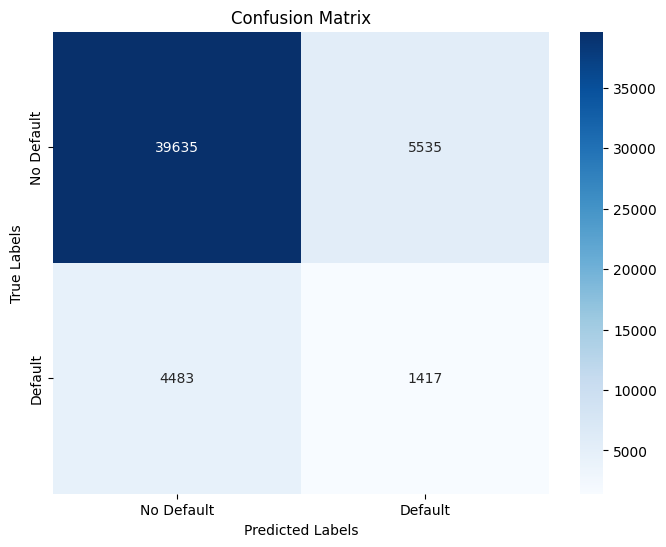

In [13]:
# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [14]:
# Evaluasi pada data training
train_accuracy_1 = accuracy_score(y_train, y_pred_train)
train_precision_1 = precision_score(y_train, y_pred_train, average='weighted')
train_recall_1 = recall_score(y_train, y_pred_train, average='weighted')
train_f1_1 = f1_score(y_train, y_pred_train, average='weighted')

# Evaluasi pada data test
test_accuracy_1 = accuracy_score(y_test, y_pred_test)
test_precision_1 = precision_score(y_test, y_pred_test, average='weighted')
test_recall_1 = recall_score(y_test, y_pred_test, average='weighted')
test_f1_1 = f1_score(y_test, y_pred_test, average='weighted')

# Menyimpan hasil evaluasi ke dalam variabel
evaluation_results = {
    'Training Accuracy': train_accuracy_1,
    'Training Precision': train_precision_1,
    'Training Recall': train_recall_1,
    'Training F1-Score': train_f1_1,
    
    '\nTest Accuracy': test_accuracy_1,
    'Test Precision': test_precision_1,
    'Test Recall': test_recall_1,
    'Test F1-Score': test_f1_1
}

# Menampilkan hasil evaluasi
print("\nEvaluation Results:")
for metric, value in evaluation_results.items():
    print(f"{metric}: {value:.4f}")

# Menampilkan classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred_test))


Evaluation Results:
Training Accuracy: 1.0000
Training Precision: 1.0000
Training Recall: 1.0000
Training F1-Score: 1.0000

Test Accuracy: 0.8038
Test Precision: 0.8181
Test Recall: 0.8038
Test F1-Score: 0.8107

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     45170
           1       0.20      0.24      0.22      5900

    accuracy                           0.80     51070
   macro avg       0.55      0.56      0.55     51070
weighted avg       0.82      0.80      0.81     51070



-> 1, train: 88.37, test: 88.45
-> 2, train: 88.37, test: 88.45
-> 3, train: 88.37, test: 88.45
-> 4, train: 88.37, test: 88.45
-> 5, train: 88.47, test: 88.54
-> 6, train: 88.55, test: 88.53
-> 7, train: 88.57, test: 88.53
-> 8, train: 88.69, test: 88.54
-> 9, train: 88.82, test: 88.43
-> 10, train: 89.11, test: 88.28
-> 11, train: 89.54, test: 87.90
-> 12, train: 90.04, test: 87.53
-> 13, train: 90.76, test: 86.83
-> 14, train: 91.55, test: 86.29
-> 15, train: 92.44, test: 85.83
-> 16, train: 93.47, test: 84.98
-> 17, train: 94.48, test: 84.38
-> 18, train: 95.48, test: 83.64
-> 19, train: 96.40, test: 82.98
-> 20, train: 97.23, test: 82.43
Best Max Depth: 5, Best Validation Accuracy: 88.543


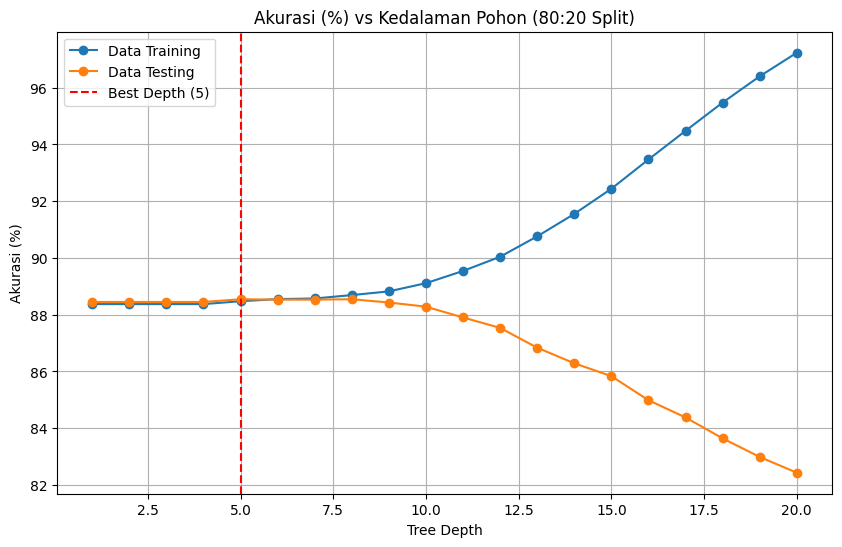

In [15]:
# Pisahkan fitur dan target dari dataset
X = df.drop(columns=['Default'])  # Fitur-fitur
y = df['Default']  # Target

# Split data dengan rasio 80:20
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2,random_state=42)

# define lists to collect scores
train_scores1, test_scores1 = [], []

# define the tree depths to evaluate
values1 = [i for i in range(1, 21)]

# evaluate a decision tree for each depth
for i in values1:
    # configure the model dengan nama variabel dt_model
    dt_model = DecisionTreeClassifier(max_depth=i)

    # fit model on the training dataset
    dt_model.fit(X_train1, y_train1)

    # evaluate on the train dataset
    train_yhat1 = dt_model.predict(X_train1)
    train_acc1 = accuracy_score(y_train1, train_yhat1) * 100  # Konversi ke persen
    train_scores1.append(train_acc1)

    # Evaluasi pada test dataset dan simpan dalam list
    test_yhat1 = dt_model.predict(X_test1)
    test_acc1 = accuracy_score(y_test1, test_yhat1) * 100
    test_scores1.append(test_acc1)
    
    # summarize progress
    print('-> %d, train: %.2f, test: %.2f' % (i, train_acc1, test_acc1))

# Menentukan kedalaman dengan akurasi validation terbaik
best_depth1 = values1[test_scores1.index(max(test_scores1))]
print(f"Best Max Depth: {best_depth1}, Best Validation Accuracy: {max(test_scores1):.3f}")

# plot of train and test scores vs tree depth
plt.figure(figsize=(10, 6))
plt.plot(values1, train_scores1, '-o', label='Data Training')
plt.plot(values1, test_scores1, '-o', label='Data Testing')
plt.axvline(x=best_depth1, linestyle='--', color='red', label=f'Best Depth ({best_depth1})')
plt.title('Akurasi (%) vs Kedalaman Pohon (80:20 Split)')
plt.xlabel('Tree Depth')
plt.ylabel('Akurasi (%)')
plt.legend()
plt.grid(True)
plt.show()

Hasil mengindikasikan adanya masalah performa model, terutama dalam menangani kelas minoritas. Meskipun Training Accuracy mencapai 1.0 (indikasi kuat overfitting), Test Accuracy turun menjadi 0.80, dan metrik seperti precision serta recall pada kelas minoritas.

*Indikasi Overfitting*
1. Training Accuracy yang Sempurna (1.0):
* Model terlalu "hafal" data pelatihan, termasuk noise dan pola-pola spesifik yang tidak muncul di data uji.
2. Test Accuracy yang Lebih Rendah:
* Akurasi pada data uji (80%) jauh lebih rendah dibandingkan akurasi data pelatihan.
3. Precision dan Recall Rendah pada Kelas Minoritas:
* Precision (20%) dan recall (24%) pada kelas minoritas sangat buruk. Model cenderung bias terhadap kelas mayoritas karena data minoritas

# **Siklus 2 (Modeling using SMOTE)**

In [4]:
# Assuming there's a CSV file in the directory, load it using pandas
# Replace 'filename.csv' with the actual file name from os.listdir output
data_path = os.path.join(path, 'Loan_default.csv')
df = pd.read_csv(data_path)

In [5]:
#drop kolom yang tidak berhubungan dengan proses klasifikasi
columns = ['LoanID']
df.drop(columns, inplace=True, axis=1)

In [6]:
# Inisialisasi LabelEncoder
le = LabelEncoder()

# Mencari semua kolom yang bertipe object
columns_to_encode = df.select_dtypes(include=['object']).columns

# Loop untuk encode setiap kolom bertipe object
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

# Menampilkan hasil
print("Kolom yang di-encode:", columns_to_encode.tolist())
df.head()

Kolom yang di-encode: ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  int32  
 10  EmploymentType  255347 non-null  int32  
 11  MaritalStatus   255347 non-null  int32  
 12  HasMortgage     255347 non-null  int32  
 13  HasDependents   255347 non-null  int32  
 14  LoanPurpose     255347 non-null  int32  
 15  HasCoSigner     255347 non-null  int32  
 16  Default         255347 non-null  int64  
dtypes: float64

In [8]:
df.isna().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [9]:
# Checking Duplicate
df.duplicated().sum()

0

In [10]:
# Pisahkan fitur dan target dari dataset
X = df.drop(columns=['Default'])  # Fitur-fitur
y = df['Default']  # Target

In [11]:
# Pastikan data dalam format numpy array sebelum SMOTE
X = np.array(X)
y = np.array(y)

# Balancing Imbalance Data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

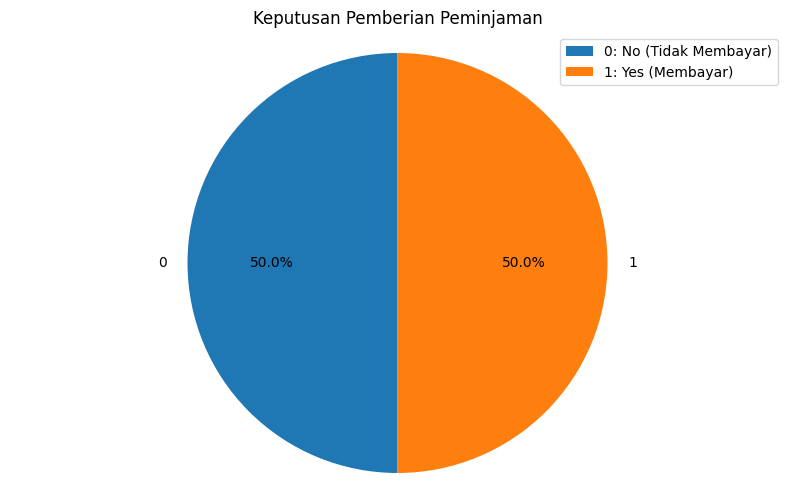

In [12]:
# Hitung jumlah kemunculan setiap nilai unik
unique, counts = np.unique(y_resampled, return_counts=True)

# Buat pie chart
plt.figure(figsize=(10, 6))
plt.pie(counts, labels=unique, autopct='%1.1f%%', startangle=90)

# Tambahkan judul
plt.title('Keputusan Pemberian Peminjaman')

# Tambahkan legenda
label_mapping = {0: "No (Tidak Membayar)", 1: "Yes (Membayar)"}
legend_labels = [f"{val}: {label_mapping[val]}" for val in unique]
plt.legend(legend_labels, loc="upper right")

# Pastikan pie chart berbentuk lingkaran
plt.axis('equal')
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(361110, 16)
(361110,)
(90278, 16)
(90278,)


In [14]:
# Pastikan X dan y dalam format numpy array
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.2,random_state=42)
# Inisialisasi model Decision Tree
model = DecisionTreeClassifier()
    
# Train model
model.fit(X_train, y_train)
    
# Prediksi pada data training dan testing
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

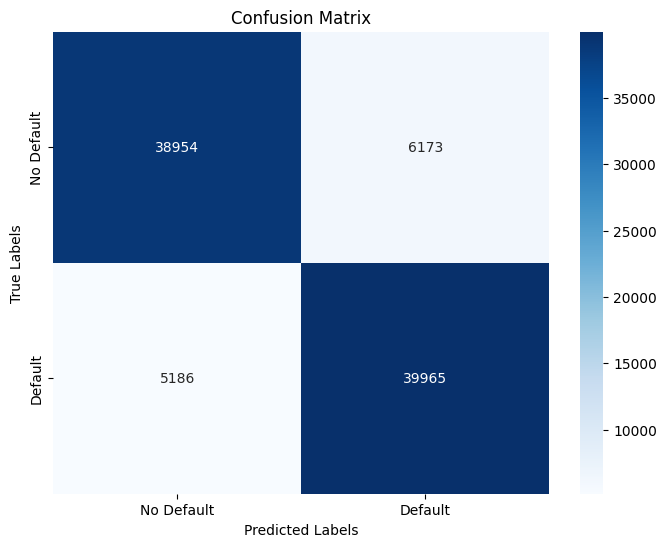

In [44]:
# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [45]:
# Evaluasi pada data training
train_accuracy_2 = accuracy_score(y_train, y_pred_train)
train_precision_2 = precision_score(y_train, y_pred_train, average='weighted')
train_recall_2 = recall_score(y_train, y_pred_train, average='weighted')
train_f1_2 = f1_score(y_train, y_pred_train, average='weighted')

# Evaluasi pada data test
test_accuracy_2 = accuracy_score(y_test, y_pred_test)
test_precision_2 = precision_score(y_test, y_pred_test, average='weighted')
test_recall_2 = recall_score(y_test, y_pred_test, average='weighted')
test_f1_2 = f1_score(y_test, y_pred_test, average='weighted')

# Menyimpan hasil evaluasi ke dalam variabel
evaluation_results = {
    'Training Accuracy': train_accuracy_2,
    'Training Precision': train_precision_2,
    'Training Recall': train_recall_2,
    'Training F1-Score': train_f1_2,
    
    '\nTest Accuracy': test_accuracy_2,
    'Test Precision': test_precision_2,
    'Test Recall': test_recall_2,
    'Test F1-Score': test_f1_2
}

# Menampilkan hasil evaluasi
print("\nEvaluation Results:")
for metric, value in evaluation_results.items():
    print(f"{metric}: {value:.4f}")

# Menampilkan classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred_test))


Evaluation Results:
Training Accuracy: 1.0000
Training Precision: 1.0000
Training Recall: 1.0000
Training F1-Score: 1.0000

Test Accuracy: 0.8742
Test Precision: 0.8744
Test Recall: 0.8742
Test F1-Score: 0.8742

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     45127
           1       0.87      0.89      0.88     45151

    accuracy                           0.87     90278
   macro avg       0.87      0.87      0.87     90278
weighted avg       0.87      0.87      0.87     90278



-> 1, train: 62.60, test: 62.40
-> 2, train: 68.29, test: 68.09
-> 3, train: 71.42, test: 71.29
-> 4, train: 78.75, test: 78.68
-> 5, train: 81.86, test: 81.87
-> 6, train: 82.86, test: 82.86
-> 7, train: 85.21, test: 85.17
-> 8, train: 85.86, test: 85.75
-> 9, train: 86.97, test: 86.72
-> 10, train: 88.25, test: 88.02
-> 11, train: 88.80, test: 88.36
-> 12, train: 89.50, test: 88.65
-> 13, train: 90.42, test: 89.25
-> 14, train: 91.10, test: 89.30
-> 15, train: 92.05, test: 89.63
-> 16, train: 92.85, test: 89.60
-> 17, train: 93.82, test: 89.76
-> 18, train: 94.65, test: 89.65
-> 19, train: 95.43, test: 89.24
-> 20, train: 96.22, test: 88.87
Best Max Depth: 17, Best Validation Accuracy: 89.761


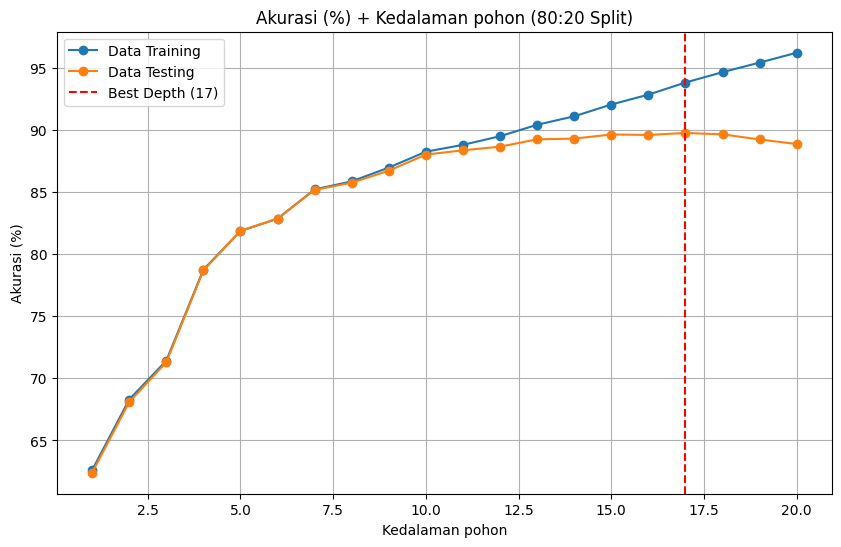

In [46]:
# Pisahkan fitur dan target dari dataset
X = df.drop(columns=['Default'])  # Fitur-fitur
y = df['Default']  # Target

# Pastikan data dalam format numpy array sebelum SMOTE
X = np.array(X)
y = np.array(y)

# Mengatasi Imbalance data dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data dengan rasio 80:20
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled, y_resampled, test_size=0.2,random_state=42)

# define lists to collect scores
train_scores2, test_scores2 = [], []

# define the tree depths to evaluate
values2 = [i for i in range(1, 21)]

# evaluate a decision tree for each depth
for i in values2:
    # configure the model dengan nama variabel dt_model
    dt_model = DecisionTreeClassifier(max_depth=i)

    # fit model on the training dataset
    dt_model.fit(X_train2, y_train2)

    # evaluate on the train dataset
    train_yhat2 = dt_model.predict(X_train2)
    train_acc2 = accuracy_score(y_train2, train_yhat2) * 100  # Konversi ke persen
    train_scores2.append(train_acc2)

    # evaluate on the test dataset
    test_yhat2 = dt_model.predict(X_test2)
    test_acc2 = accuracy_score(y_test2, test_yhat2) * 100  # Konversi ke persen
    test_scores2.append(test_acc2)

    # summarize progress
    print('-> %d, train: %.2f, test: %.2f' % (i, train_acc2, test_acc2))
    
# Menentukan kedalaman dengan akurasi validation terbaik
best_depth2 = values2[test_scores2.index(max(test_scores2))]
print(f"Best Max Depth: {best_depth2}, Best Validation Accuracy: {max(test_scores2):.3f}")

# plot of train and test scores vs tree depth
plt.figure(figsize=(10, 6))   
plt.plot(values2, train_scores2, '-o', label='Data Training')
plt.plot(values2, test_scores2, '-o', label='Data Testing')
plt.axvline(x=best_depth2, linestyle='--', color='red', label=f'Best Depth ({best_depth2})')
plt.title('Akurasi (%) + Kedalaman pohon (80:20 Split)')
plt.xlabel('Kedalaman pohon')
plt.ylabel('Akurasi (%)')
plt.legend()
plt.grid(True)
plt.show()

# **Siklus 3 (Modeling using K-Fold Cross Validation)**

In [47]:
# Pisahkan fitur dan target dari dataset
X = df.drop(columns=['Default'])  # Fitur-fitur
y = df['Default']  # Target

# Pastikan data dalam format numpy array sebelum SMOTE
X = np.array(X)
y = np.array(y)

# Terapkan SMOTE pada keseluruhan dataset sebelum split
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Menyimpan hasil metrik untuk setiap fold
train_accuracies_3 = []
test_accuracies_3 = []
train_precisions_3 = []
test_precisions_3 = []
train_recalls_3 = []
test_recalls_3 = []
train_f1_scores_3 = []
test_f1_scores_3 = []
confusion_matrices_3 = []

# Inisialisasi KFold dengan 5 fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterasi K-Fold pada dataset yang sudah di-SMOTE
for train_index, test_index in kf.split(X_smote):
    # Split data menjadi training dan testing berdasarkan indeks fold
    X_train, X_test = X_smote[train_index], X_smote[test_index] # data training
    y_train, y_test = y_smote[train_index], y_smote[test_index] # data testing

    # Inisialisasi dan latih model Decision Tree pada data training
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # Prediksi pada data training
    train_predictions_3 = model.predict(X_train)
    train_accuracy_3 = accuracy_score(y_train, train_predictions_3)

    # Prediksi pada data testing
    test_predictions_3 = model.predict(X_test)
    test_accuracy_3 = accuracy_score(y_test, test_predictions_3)

    # Evaluasi untuk data training
    train_precision_3 = precision_score(y_train, train_predictions_3, average='macro')
    train_recall_3 = recall_score(y_train, train_predictions_3, average='macro')
    train_f1_3 = f1_score(y_train, train_predictions_3, average='macro')

    # Evaluasi untuk data testing
    test_precision_3 = precision_score(y_test, test_predictions_3, average='macro')
    test_recall_3 = recall_score(y_test, test_predictions_3, average='macro')
    test_f1_3 = f1_score(y_test, test_predictions_3, average='macro')

    # Confusion matrix untuk data testing
    conf_matrix = confusion_matrix(y_test, test_predictions_3)

    # Simpan hasil evaluasi di setiap fold
    train_accuracies_3.append(train_accuracy_3)
    test_accuracies_3.append(test_accuracy_3)
    train_precisions_3.append(train_precision_3)
    test_precisions_3.append(test_precision_3)
    train_recalls_3.append(train_recall_3)
    test_recalls_3.append(test_recall_3)
    train_f1_scores_3.append(train_f1_3)
    test_f1_scores_3.append(test_f1_3)
    confusion_matrices_3.append(conf_matrix)

# Menampilkan hasil rata-rata dari semua fold
mean_train_accuracy_3 = np.mean(train_accuracies_3)
mean_test_accuracy_3 = np.mean(test_accuracies_3)
mean_train_precision_3 = np.mean(train_precisions_3)
mean_test_precision_3 = np.mean(test_precisions_3)
mean_train_recall_3 = np.mean(train_recalls_3)
mean_test_recall_3 = np.mean(test_recalls_3)
mean_train_f1_score_3 = np.mean(train_f1_scores_3)
mean_test_f1_score_3 = np.mean(test_f1_scores_3)

# Cetak rata-rata hasil evaluasi
print("\nRata-Rata Hasil Evaluasi K-Fold:")
print(f"Rata-rata Training Accuracy: {mean_train_accuracy_3:.4f}")
print(f"Rata-rata Testing Accuracy: {mean_test_accuracy_3:.4f}")
print(f"Rata-rata Training Precision: {mean_train_precision_3:.4f}")
print(f"Rata-rata Testing Precision: {mean_test_precision_3:.4f}")
print(f"Rata-rata Training Recall: {mean_train_recall_3:.4f}")
print(f"Rata-rata Testing Recall: {mean_test_recall_3:.4f}")
print(f"Rata-rata Training F1-Score: {mean_train_f1_score_3:.4f}")
print(f"Rata-rata Testing F1-Score: {mean_test_f1_score_3:.4f}")

# Menyimpan hasil ke DataFrame
evaluations_df_3 = pd.DataFrame({
    'Fold': range(1, 6),
    'Train Accuracy': [acc * 100 for acc in train_accuracies_3],
    'Test Accuracy': [acc * 100 for acc in test_accuracies_3],
    'Train Precision': [prec * 100 for prec in train_precisions_3],
    'Test Precision': [prec * 100 for prec in test_precisions_3],
    'Train Recall': [rec * 100 for rec in train_recalls_3],
    'Test Recall': [rec * 100 for rec in test_recalls_3],
    'Train F1-Score': [f1 * 100 for f1 in train_f1_scores_3],
    'Test F1-Score': [f1 * 100 for f1 in test_f1_scores_3],
    'Model': ['Decision Tree'] * 5
})

# Menampilkan DataFrame
print("\nSummary of K-Fold Evaluation:")
print(evaluations_df_3)


Rata-Rata Hasil Evaluasi K-Fold:
Rata-rata Training Accuracy: 1.0000
Rata-rata Testing Accuracy: 0.8764
Rata-rata Training Precision: 1.0000
Rata-rata Testing Precision: 0.8765
Rata-rata Training Recall: 1.0000
Rata-rata Testing Recall: 0.8764
Rata-rata Training F1-Score: 1.0000
Rata-rata Testing F1-Score: 0.8763

Summary of K-Fold Evaluation:
   Fold  Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
0     1           100.0      87.509692            100.0       87.524808   
1     2           100.0      87.781076            100.0       87.795584   
2     3           100.0      87.436585            100.0       87.450427   
3     4           100.0      87.823034            100.0       87.833663   
4     5           100.0      87.626970            100.0       87.642931   

   Train Recall  Test Recall  Train F1-Score  Test F1-Score          Model  
0         100.0    87.509426           100.0      87.508378  Decision Tree  
1         100.0    87.780730           100.0    

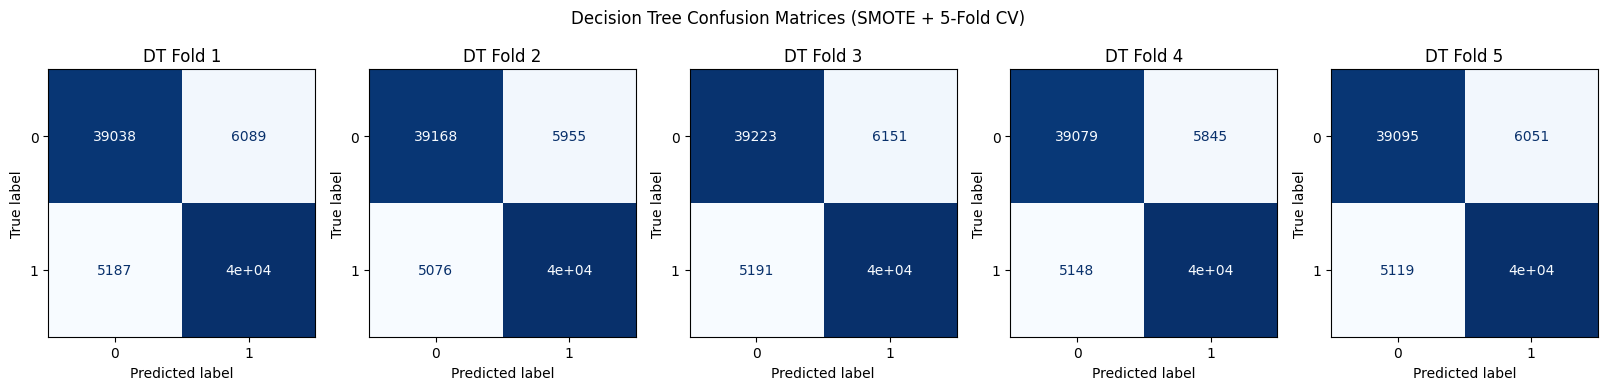

In [50]:
# Membuat subplots untuk Decision Tree
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, (ax, dt_conf_matrix) in enumerate(zip(axes, confusion_matrices_3), 1):
    disp = ConfusionMatrixDisplay(confusion_matrix=dt_conf_matrix)
    disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
    ax.set_title(f'DT Fold {i}')
fig.suptitle('Decision Tree Confusion Matrices (SMOTE + 5-Fold CV)')
plt.show()

Depth: 1
Mean Train Accuracy: 63.067
Mean Test Accuracy: 62.979
------------------------------
Depth: 2
Mean Train Accuracy: 69.517
Mean Test Accuracy: 69.471
------------------------------
Depth: 3
Mean Train Accuracy: 71.392
Mean Test Accuracy: 71.392
------------------------------
Depth: 4
Mean Train Accuracy: 78.661
Mean Test Accuracy: 78.639
------------------------------
Depth: 5
Mean Train Accuracy: 81.849
Mean Test Accuracy: 81.828
------------------------------
Depth: 6
Mean Train Accuracy: 82.741
Mean Test Accuracy: 82.729
------------------------------
Depth: 7
Mean Train Accuracy: 85.141
Mean Test Accuracy: 85.058
------------------------------
Depth: 8
Mean Train Accuracy: 85.830
Mean Test Accuracy: 85.689
------------------------------
Depth: 9
Mean Train Accuracy: 87.084
Mean Test Accuracy: 86.830
------------------------------
Depth: 10
Mean Train Accuracy: 88.209
Mean Test Accuracy: 87.872
------------------------------
Depth: 11
Mean Train Accuracy: 88.929
Mean Test A

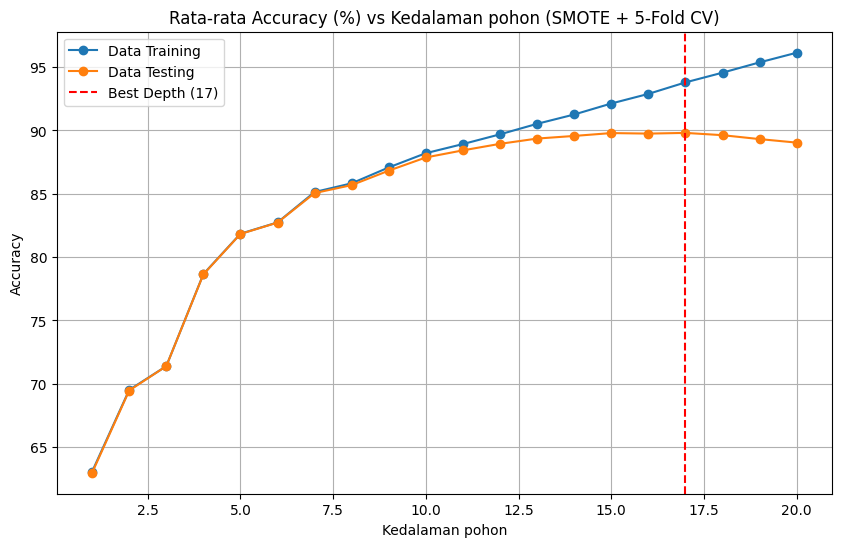

In [51]:
# Pisahkan fitur dan target dari dataset
X = df.drop(columns=['Default'])  # Fitur-fitur
y = df['Default']  # Target

# Pastikan data dalam format numpy array sebelum SMOTE
X = np.array(X)
y = np.array(y)

# Terapkan SMOTE sebelum proses splitting
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Inisialisasi KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define lists untuk menyimpan rata-rata scores
mean_train_scores3 = []
mean_test_scores3 = []

# Define the tree depths
values3 = [i for i in range(1, 21)]

# Evaluasi untuk setiap depth
for depth in values3:
    depth_train_scores = []
    depth_test_scores = []

    # Lakukan k-fold cross validation
    for train_idx, test_idx in kf.split(X_smote):
        # Split data berdasarkan index fold
        X_train, X_test = X_smote[train_idx], X_smote[test_idx]
        y_train, y_test = y_smote[train_idx], y_smote[test_idx]

        # Configure dan train model
        dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
        dt_model.fit(X_train, y_train)

        # Evaluate pada training set
        train_yhat = dt_model.predict(X_train)
        train_acc = accuracy_score(y_train, train_yhat)
        depth_train_scores.append(train_acc)

        # Evaluate pada test set
        test_yhat = dt_model.predict(X_test)
        test_acc = accuracy_score(y_test, test_yhat)
        depth_test_scores.append(test_acc)

    # Hitung rata-rata scores untuk depth ini
    mean_train = np.mean(depth_train_scores) * 100
    mean_test = np.mean(depth_test_scores) * 100

    mean_train_scores3.append(mean_train)
    mean_test_scores3.append(mean_test)

    # Print progress
    print(f'Depth: {depth}')
    print(f'Mean Train Accuracy: {mean_train:.3f}')
    print(f'Mean Test Accuracy: {mean_test:.3f}')
    print('-' * 30)

# Menentukan kedalaman dengan akurasi validation terbaik
best_depth3 = values3[mean_test_scores3.index(max(mean_test_scores3))]
print(f"Best Max Depth: {best_depth3}, Best Validation Accuracy: {max(mean_test_scores3):.3f}")

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(values3, mean_train_scores3, '-o', label='Data Training')
plt.plot(values3, mean_test_scores3, '-o', label='Data Testing')
plt.axvline(x=best_depth3, linestyle='--', color='red', label=f'Best Depth ({best_depth3})')
plt.xlabel('Kedalaman pohon')
plt.ylabel('Accuracy')
plt.title('Rata-rata Accuracy (%) vs Kedalaman pohon (SMOTE + 5-Fold CV)')
plt.legend()
plt.grid(True)
plt.show()


# **Siklus 4 (Modeling using Hyperparameter)**

In [39]:
# Pastikan X dan y dalam format numpy array
X = np.array(X)
y = np.array(y)

# Terapkan SMOTE sebelum splitting
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Parameter yang akan dituning
param_grid = {
    'max_depth': [5, 10, 15, 17, 20, 25, None],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model
dt_model = DecisionTreeClassifier()

# GridSearchCV tanpa cross-validation (cv=None)
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=None,  # Tidak menggunakan cross-validation
    verbose=1,
    n_jobs=-1  # Menggunakan semua prosesor
)

# Latih Grid Search
grid_search.fit(X_train, y_train)

# Model terbaik
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluasi pada data training
train_yhat_4 = best_model.predict(X_train)
train_acc_4 = accuracy_score(y_train, train_yhat_4)
train_precision_4 = precision_score(y_train, train_yha_4, average='macro')
train_recall_4 = recall_score(y_train, train_yhat_4, average='macro')
train_f1_4 = f1_score(y_train, train_yhat_4, average='macro')

# Cetak hasil evaluasi pada data training
print("\nHasil Evaluasi Model Terbaik pada Training Set:")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}")
print(f"Train F1-Score: {train_f1:.4f}")

# Evaluasi pada data test
test_yhat = best_model.predict(X_test)
test_acc_4 = accuracy_score(y_test, test_yhat_4)
test_precision_4 = precision_score(y_test, test_yhat_4, average='macro')
test_recall_4 = recall_score(y_test, test_yhat_4, average='macro')
test_f1_4 = f1_score(y_test, test_yhat_4, average='macro')

# Cetak hasil evaluasi pada data test
print("\nHasil Evaluasi Model Terbaik pada Test Set:")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")

Fitting 5 folds for each of 378 candidates, totalling 1890 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 17, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}

Hasil Evaluasi Model Terbaik pada Training Set:
Train Accuracy: 0.9232
Train Precision: 0.9254
Train Recall: 0.9174
Train F1-Score: 0.9170

Hasil Evaluasi Model Terbaik pada Test Set:
Test Accuracy: 0.9015
Test Precision: 0.9024
Test Recall: 0.8944
Test F1-Score: 0.8939


In [15]:
# Pisahkan fitur dan target dari dataset
X = df.drop(columns=['Default'])  # Fitur-fitur
y = df['Default']  # Target

# Pastikan X dan y dalam format numpy array
X = np.array(X)
y = np.array(y)

# Terapkan SMOTE sebelum melakukan split
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Split data menjadi training dan validation set
X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=42
)

# Parameter terbaik dari hyperparameter tuning
best_params = {
    'criterion': 'entropy',
    'max_features': None,
    'min_samples_leaf': 2,
    'min_samples_split': 10,
    'max_depth': 17
}

# Inisialisasi model dengan parameter terbaik
final_model = DecisionTreeClassifier(**best_params)

# Latih ulang model dengan data training
final_model.fit(X_train, y_train)

# Evaluasi pada data training
train_yhat_4 = final_model.predict(X_train)
train_acc_4 = accuracy_score(y_train, train_yhat_4)
train_precision_4 = precision_score(y_train, train_yhat_4, average='macro')
train_recall_4 = recall_score(y_train, train_yhat_4, average='macro')
train_f1_4 = f1_score(y_train, train_yhat_4, average='macro')

# Evaluasi pada data testing
test_yhat_4 = final_model.predict(X_test)
test_acc_4 = accuracy_score(y_test, test_yhat_4)
test_precision_4 = precision_score(y_test, test_yhat_4, average='macro')
test_recall_4 = recall_score(y_test, test_yhat_4, average='macro')
test_f1_4 = f1_score(y_test, test_yhat_4, average='macro')

# Menyimpan hasil evaluasi ke dalam dictionary
evaluation_results = {
    'Training Accuracy': train_acc_4 * 100,
    'Training Precision': train_precision_4* 100,
    'Training Recall': train_recall_4 * 100,
    'Training F1-Score': train_f1_4 * 100,
    '\nTest Accuracy': test_acc_4 * 100,
    'Test Precision': test_precision_4 * 100,
    'Test Recall': test_recall_4 * 100,
    'Test F1-Score': test_f1_4 * 100
}

# Menampilkan hasil evaluasi
print("\nEvaluation Results:")
for metric, value in evaluation_results.items():
    print(f"{metric}: {value:.3f}")

# Menampilkan classification report
print("\nClassification Report (Training Data):")
print(classification_report(y_train, y_pred_train))

print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred_test))


Evaluation Results:
Training Accuracy: 92.984
Training Precision: 93.466
Training Recall: 92.984
Training F1-Score: 92.965

Test Accuracy: 90.073
Test Precision: 90.537
Test Recall: 90.074
Test F1-Score: 90.045

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    180567
           1       1.00      1.00      1.00    180543

    accuracy                           1.00    361110
   macro avg       1.00      1.00      1.00    361110
weighted avg       1.00      1.00      1.00    361110


Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     45127
           1       0.87      0.88      0.88     45151

    accuracy                           0.87     90278
   macro avg       0.87      0.87      0.87     90278
weighted avg       0.87      0.87      0.87     90278



# *Menyimpan hasil Model Prediction*ke dalam file*

In [18]:
import joblib

# Simpan model ke file
joblib.dump(final_model, 'D:\KULIAH\SEMESTER 7\SKRIPSI\File Code\Credit Risk Prediction_model.pkl')

['D:\\KULIAH\\SEMESTER 7\\SKRIPSI\\File Code\\Credit Risk Prediction_model.pkl']

Best Max Depth: 17, Best Validation Accuracy: 90.086


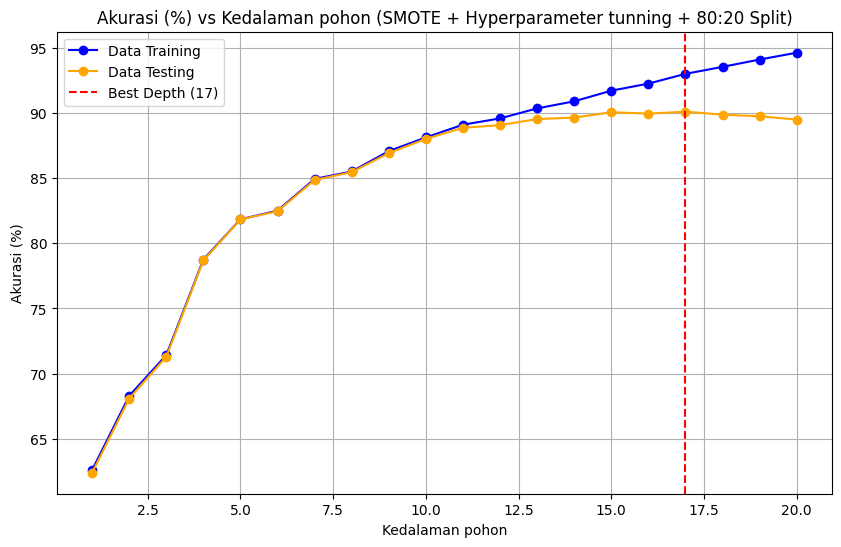

In [67]:
# Pisahkan fitur dan target dari dataset
X = df.drop(columns=['Default'])  # Fitur-fitur
y = df['Default']  # Target

# Pastikan X dan y dalam format numpy array
X = np.array(X)
y = np.array(y)

# Terapkan SMOTE sebelum melakukan split
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Split data menjadi training dan validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=42
)

# Best parameters dari Grid Search
best_params = {
    'criterion': 'entropy',
    'max_features': None,
    'min_samples_leaf': 2,
    'min_samples_split': 10,
}

# Range untuk kedalaman pohon
tree_depths = [i for i in range(1, 21)]

# Lists untuk menyimpan hasil akurasi
train_accuracies = []
val_accuracies = []

# Loop untuk setiap kedalaman pohon
for depth in tree_depths:
    # Tambahkan max_depth ke parameter
    best_params['max_depth'] = depth
    
    # Inisialisasi model dengan parameter terbaik
    model = DecisionTreeClassifier(**best_params, random_state=42)
    
    # Latih model
    model.fit(X_train, y_train)
    
    # Evaluasi pada data training
    y_pred_train = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train) * 100
    train_accuracies.append(train_accuracy)
    
    # Evaluasi pada data validation
    y_pred_val = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_pred_val) * 100
    val_accuracies.append(val_accuracy)

# Menentukan kedalaman dengan akurasi validation terbaik
best_depth4 = tree_depths[val_accuracies.index(max(val_accuracies))]
print(f"Best Max Depth: {best_depth4}, Best Validation Accuracy: {max(val_accuracies):.3f}")

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(tree_depths, train_accuracies, '-o', label='Data Training', color='blue')
plt.plot(tree_depths, val_accuracies, '-o', label='Data Testing', color='orange')
plt.axvline(x=best_depth4, linestyle='--', color='red', label=f'Best Depth ({best_depth4})')
plt.xlabel('Kedalaman pohon')
plt.ylabel('Akurasi (%)')
plt.title('Akurasi (%) vs Kedalaman pohon (SMOTE + Hyperparameter tunning + 80:20 Split)')
plt.legend()
plt.grid(True)
plt.show()

# **Siklus 5 (Modeling using hyperparameter & k-fold)**

In [49]:
# Pastikan data X dan y sudah dalam format numpy array
X = np.array(X)
y = np.array(y)

# Terapkan SMOTE sebelum K-Fold
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Inisialisasi Decision Tree
dt_model = DecisionTreeClassifier()

# Parameter untuk Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],       # Fungsi pemisahan
    'max_depth': [5, 10, 15, 17, 20, None], # Kedalaman maksimal pohon
    'min_samples_split': [2, 5, 10],        # Minimum sampel untuk membagi node
    'min_samples_leaf': [1, 2, 5],          # Minimum sampel di setiap daun
    'max_features': [None, 'sqrt', 'log2']  # Jumlah fitur maksimum yang digunakan
}

# Inisialisasi K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='accuracy',  # Menggunakan metrik akurasi untuk evaluasi
    cv=kf,               # Gunakan K-Fold Cross Validation
    verbose=1,           # Tampilkan proses pencarian
    n_jobs=-1            # Gunakan semua prosesor yang tersedia
)

# Fit model dengan data hasil SMOTE
grid_search.fit(X_smote, y_smote)

# Menampilkan hasil terbaik dari GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.3f}")

# Menggunakan parameter terbaik untuk evaluasi dengan K-Fold
best_params = grid_search.best_params_
dt_model_best = DecisionTreeClassifier(**best_params, random_state=42)

# List untuk menyimpan metrik
results = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X_smote, y_smote)):
    # Split data berdasarkan indeks fold
    X_train, X_test = X_smote[train_idx], X_smote[test_idx]
    y_train, y_test = y_smote[train_idx], y_smote[test_idx]

    # Latih model dengan parameter terbaik
    dt_model_best.fit(X_train, y_train)

    # Prediksi pada data training
    y_pred_train = dt_model_best.predict(X_train)
    train_accuracy_5 = accuracy_score(y_train, y_pred_train)
    train_precision_5 = precision_score(y_train, y_pred_train, average='macro')
    train_recall_5 = recall_score(y_train, y_pred_train, average='macro')
    train_f1_score_5 = f1_score(y_train, y_pred_train, average='macro')

    # Prediksi pada data testing
    y_pred_test = dt_model_best.predict(X_test)
    test_accuracy_5 = accuracy_score(y_test, y_pred_test)
    test_precision_5 = precision_score(y_test, y_pred_test, average='macro')
    test_recall_5 = recall_score(y_test, y_pred_test, average='macro')
    test_f1_score_5 = f1_score(y_test, y_pred_test, average='macro')

    # Simpan hasil evaluasi
    results.append({
        'Fold': fold + 1,
        'Train Accuracy': train_accuracy_5,
        'Train Precision': train_precision_5,
        'Train Recall': train_recall_5,
        'Train F1-Score': train_f1_score_5,
        'Test Accuracy': test_accuracy_5,
        'Test Precision': test_precision_5,
        'Test Recall': test_recall_5,
        'Test F1-Score': test_f1_score_5
    })

# Konversi hasil ke DataFrame
results_df = pd.DataFrame(results)

# Menampilkan rata-rata hasil
mean_results = results_df.mean(numeric_only=True)
print("\nRata-Rata Hasil Evaluasi K-Fold:")
print(mean_results)

# Menampilkan hasil DataFrame
print("\nHasil Evaluasi Per Fold:")
print(results_df)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 17, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.901

Rata-Rata Hasil Evaluasi K-Fold:
Fold               3.000000
Train Accuracy     0.928796
Train Precision    0.934100
Train Recall       0.928796
Train F1-Score     0.928578
Test Accuracy      0.901214
Test Precision     0.906385
Test Recall        0.901214
Test F1-Score      0.900898
dtype: float64

Hasil Evaluasi Per Fold:
   Fold  Train Accuracy  Train Precision  Train Recall  Train F1-Score  \
0     1        0.929373         0.934857      0.929373        0.929150   
1     2        0.928454         0.933848      0.928454        0.928231   
2     3        0.927903         0.933438      0.927903        0.927672   
3     4        0.929584         0.934545      0.929584        0.929382   
4     5        0.928667         0.933813      0.928667        0.928455  

In [ ]:
# Pisahkan fitur dan target dari dataset
X = df.drop(columns=['Default'])  # Fitur-fitur
y = df['Default']  # Target

# Pastikan X dan y dalam format numpy array
X = np.array(X)
y = np.array(y)

# Terapkan SMOTE sebelum splitting K-Fold
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Inisialisasi KFold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# List untuk menyimpan metrik
results = []

# Lakukan K-Fold Cross Validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X_smote)):
    # Split data berdasarkan indeks fold
    X_train, X_test = X_smote[train_idx], X_smote[test_idx]
    y_train, y_test = y_smote[train_idx], y_smote[test_idx]

    # Configure dan train model
    dt_model = DecisionTreeClassifier(
        max_depth=20,    # Tetapkan kedalaman tetap
        criterion='entropy',      # Fungsi pemisahan
        max_features=None,      # Membatasi fitur dengan akar kuadrat
        min_samples_leaf=2,       # Minimum jumlah sampel di daun
        min_samples_split=10,     # Minimum jumlah sampel untuk split
    )
    dt_model.fit(X_train, y_train)

    # Evaluate pada training set
    train_yhat = dt_model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_precision = precision_score(y_train, train_yhat, average='macro')
    train_recall = recall_score(y_train, train_yhat, average='macro')
    train_f1 = f1_score(y_train, train_yhat, average='macro')

    # Evaluate pada test set
    test_yhat = dt_model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_precision = precision_score(y_test, test_yhat, average='macro')
    test_recall = recall_score(y_test, test_yhat, average='macro')
    test_f1 = f1_score(y_test, test_yhat, average='macro')

    # Simpan hasil ke dalam list
    results.append({
        'Fold': fold + 1,
        'Train Accuracy': train_acc,
        'Train Precision': train_precision,
        'Train Recall': train_recall,
        'Train F1-Score': train_f1,
        'Test Accuracy': test_acc,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1-Score': test_f1
    })

    # Print progress untuk setiap fold
    print(f"Fold {fold + 1}:")
    print(f"Train Accuracy: {train_acc:.3f}")
    print(f"Train Precision: {train_precision:.3f}")
    print(f"Train Recall: {train_recall:.3f}")
    print(f"Train F1-Score: {train_f1:.3f}")
    print(f"Test Accuracy: {test_acc:.3f}")
    print(f"Test Precision: {test_precision:.3f}")
    print(f"Test Recall: {test_recall:.3f}")
    print(f"Test F1-Score: {test_f1:.3f}")
    print('-' * 30)

# Konversi hasil ke DataFrame
results_df = pd.DataFrame(results)

# Hitung rata-rata setiap metrik
mean_train_accuracy_5 = results_df['Train Accuracy'].mean()
mean_train_precision_5 = results_df['Train Precision'].mean()
mean_train_recall_5 = results_df['Train Recall'].mean()
mean_train_f1_score_5 = results_df['Train F1-Score'].mean()

mean_test_accuracy_5 = results_df['Test Accuracy'].mean()
mean_test_precision_5 = results_df['Test Precision'].mean()
mean_test_recall_5 = results_df['Test Recall'].mean()
mean_test_f1_score_5 = results_df['Test F1-Score'].mean()

# Cetak rata-rata hasil evaluasi
print("\nRata-Rata Hasil Evaluasi K-Fold:")
print(f"Mean Train Accuracy: {mean_train_accuracy_5:.4f}")
print(f"Mean Train Precision: {mean_train_precision_5:.4f}")
print(f"Mean Train Recall: {mean_train_recall_5:.4f}")
print(f"Mean Train F1-Score: {mean_train_f1_score_5:.4f}")
print(f"Mean Test Accuracy: {mean_test_accuracy_5:.4f}")
print(f"Mean Test Precision: {mean_test_precision_5:.4f}")
print(f"Mean Test Recall: {mean_test_recall_5:.4f}")
print(f"Mean Test F1-Score: {mean_test_f1_score_5:.4f}")


Fold 1:
Train Accuracy: 0.946
Train Precision: 0.948
Train Recall: 0.946
Train F1-Score: 0.946
Test Accuracy: 0.895
Test Precision: 0.897
Test Recall: 0.895
Test F1-Score: 0.895
------------------------------
Fold 2:
Train Accuracy: 0.945
Train Precision: 0.948
Train Recall: 0.945
Train F1-Score: 0.945
Test Accuracy: 0.897
Test Precision: 0.899
Test Recall: 0.897
Test F1-Score: 0.897
------------------------------
Fold 3:
Train Accuracy: 0.945
Train Precision: 0.947
Train Recall: 0.945
Train F1-Score: 0.945
Test Accuracy: 0.898
Test Precision: 0.900
Test Recall: 0.898
Test F1-Score: 0.898
------------------------------
Fold 4:
Train Accuracy: 0.945
Train Precision: 0.948
Train Recall: 0.945
Train F1-Score: 0.945
Test Accuracy: 0.898
Test Precision: 0.900
Test Recall: 0.898
Test F1-Score: 0.897
------------------------------
Fold 5:
Train Accuracy: 0.945
Train Precision: 0.947
Train Recall: 0.945
Train F1-Score: 0.945
Test Accuracy: 0.897
Test Precision: 0.899
Test Recall: 0.897
Test F1

Depth: 1
Mean Train Accuracy: 62.451
Mean Test Accuracy: 62.409
------------------------------
Depth: 2
Mean Train Accuracy: 68.280
Mean Test Accuracy: 68.250
------------------------------
Depth: 3
Mean Train Accuracy: 71.392
Mean Test Accuracy: 71.391
------------------------------
Depth: 4
Mean Train Accuracy: 78.738
Mean Test Accuracy: 78.720
------------------------------
Depth: 5
Mean Train Accuracy: 81.916
Mean Test Accuracy: 81.903
------------------------------
Depth: 6
Mean Train Accuracy: 82.592
Mean Test Accuracy: 82.579
------------------------------
Depth: 7
Mean Train Accuracy: 84.942
Mean Test Accuracy: 84.903
------------------------------
Depth: 8
Mean Train Accuracy: 85.521
Mean Test Accuracy: 85.451
------------------------------
Depth: 9
Mean Train Accuracy: 86.959
Mean Test Accuracy: 86.788
------------------------------
Depth: 10
Mean Train Accuracy: 87.983
Mean Test Accuracy: 87.757
------------------------------
Depth: 11
Mean Train Accuracy: 88.977
Mean Test A

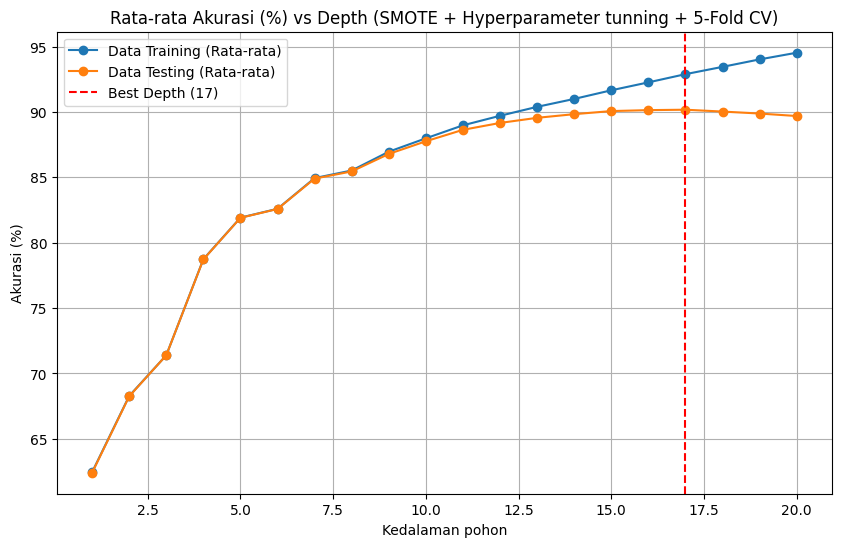

In [65]:
# Pisahkan fitur dan target dari dataset
X = df.drop(columns=['Default'])  # Fitur-fitur
y = df['Default']  # Target

# Pastikan X dan y dalam format numpy array
X = np.array(X)
y = np.array(y)

# Terapkan SMOTE sebelum splitting K-Fold
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Inisialisasi KFold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define lists untuk menyimpan rata-rata scores
mean_train_scores5 = []
mean_test_scores5 = []

# Define the tree depths
values5 = [i for i in range(1, 21)]

# Evaluasi untuk setiap depth
for depth in values5:
    depth_train_scores = []
    depth_test_scores = []

    # Lakukan k-fold cross validation
    for train_idx, test_idx in kf.split(X_smote):
        # Split data berdasarkan index fold
        X_train, X_test = X_smote[train_idx], X_smote[test_idx]
        y_train, y_test = y_smote[train_idx], y_smote[test_idx]

        # Configure dan train model
        dt_model = DecisionTreeClassifier(
            max_depth=depth,
            criterion='entropy',      # Fungsi pemisahan
            max_features=None,      # Membatasi fitur dengan akar kuadrat
            min_samples_leaf=2,       # Minimum jumlah sampel di daun
            min_samples_split=10,     # Minimum jumlah sampel untuk split
            random_state=42
        )
        dt_model.fit(X_train, y_train)

        # Evaluate pada training set
        train_yhat_5 = dt_model.predict(X_train)
        train_acc_5  = accuracy_score(y_train, train_yhat_5) * 100
        depth_train_scores.append(train_acc_5 )

        # Evaluate pada test set
        test_yhat_5  = dt_model.predict(X_test)
        test_acc_5  = accuracy_score(y_test, test_yhat_5) * 100
        depth_test_scores.append(test_acc_5)

    # Hitung rata-rata scores untuk depth ini
    mean_train = np.mean(depth_train_scores)
    mean_test = np.mean(depth_test_scores)

    mean_train_scores5.append(mean_train)
    mean_test_scores5.append(mean_test)

    # Print progress
    print(f'Depth: {depth}')
    print(f'Mean Train Accuracy: {mean_train:.3f}')
    print(f'Mean Test Accuracy: {mean_test:.3f}')
    print('-' * 30)

best_depth5 = values5[mean_test_scores5.index(max(mean_test_scores5))]
print(f"Best Max Depth: {best_depth5}, Best Validation Accuracy: {max(mean_test_scores5):.3f}")

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(values5, mean_train_scores5, '-o', label='Data Training (Rata-rata)')
plt.plot(values5, mean_test_scores5, '-o', label='Data Testing (Rata-rata)')
plt.axvline(x=best_depth5, linestyle='--', color='red', label=f'Best Depth ({best_depth5})')
plt.xlabel('Kedalaman pohon')
plt.ylabel('Akurasi (%)')
plt.title('Rata-rata Akurasi (%) vs Depth (SMOTE + Hyperparameter tunning + 5-Fold CV)')
plt.legend()
plt.grid(True)
plt.show()


# **Grafik Hasil Akurasi**

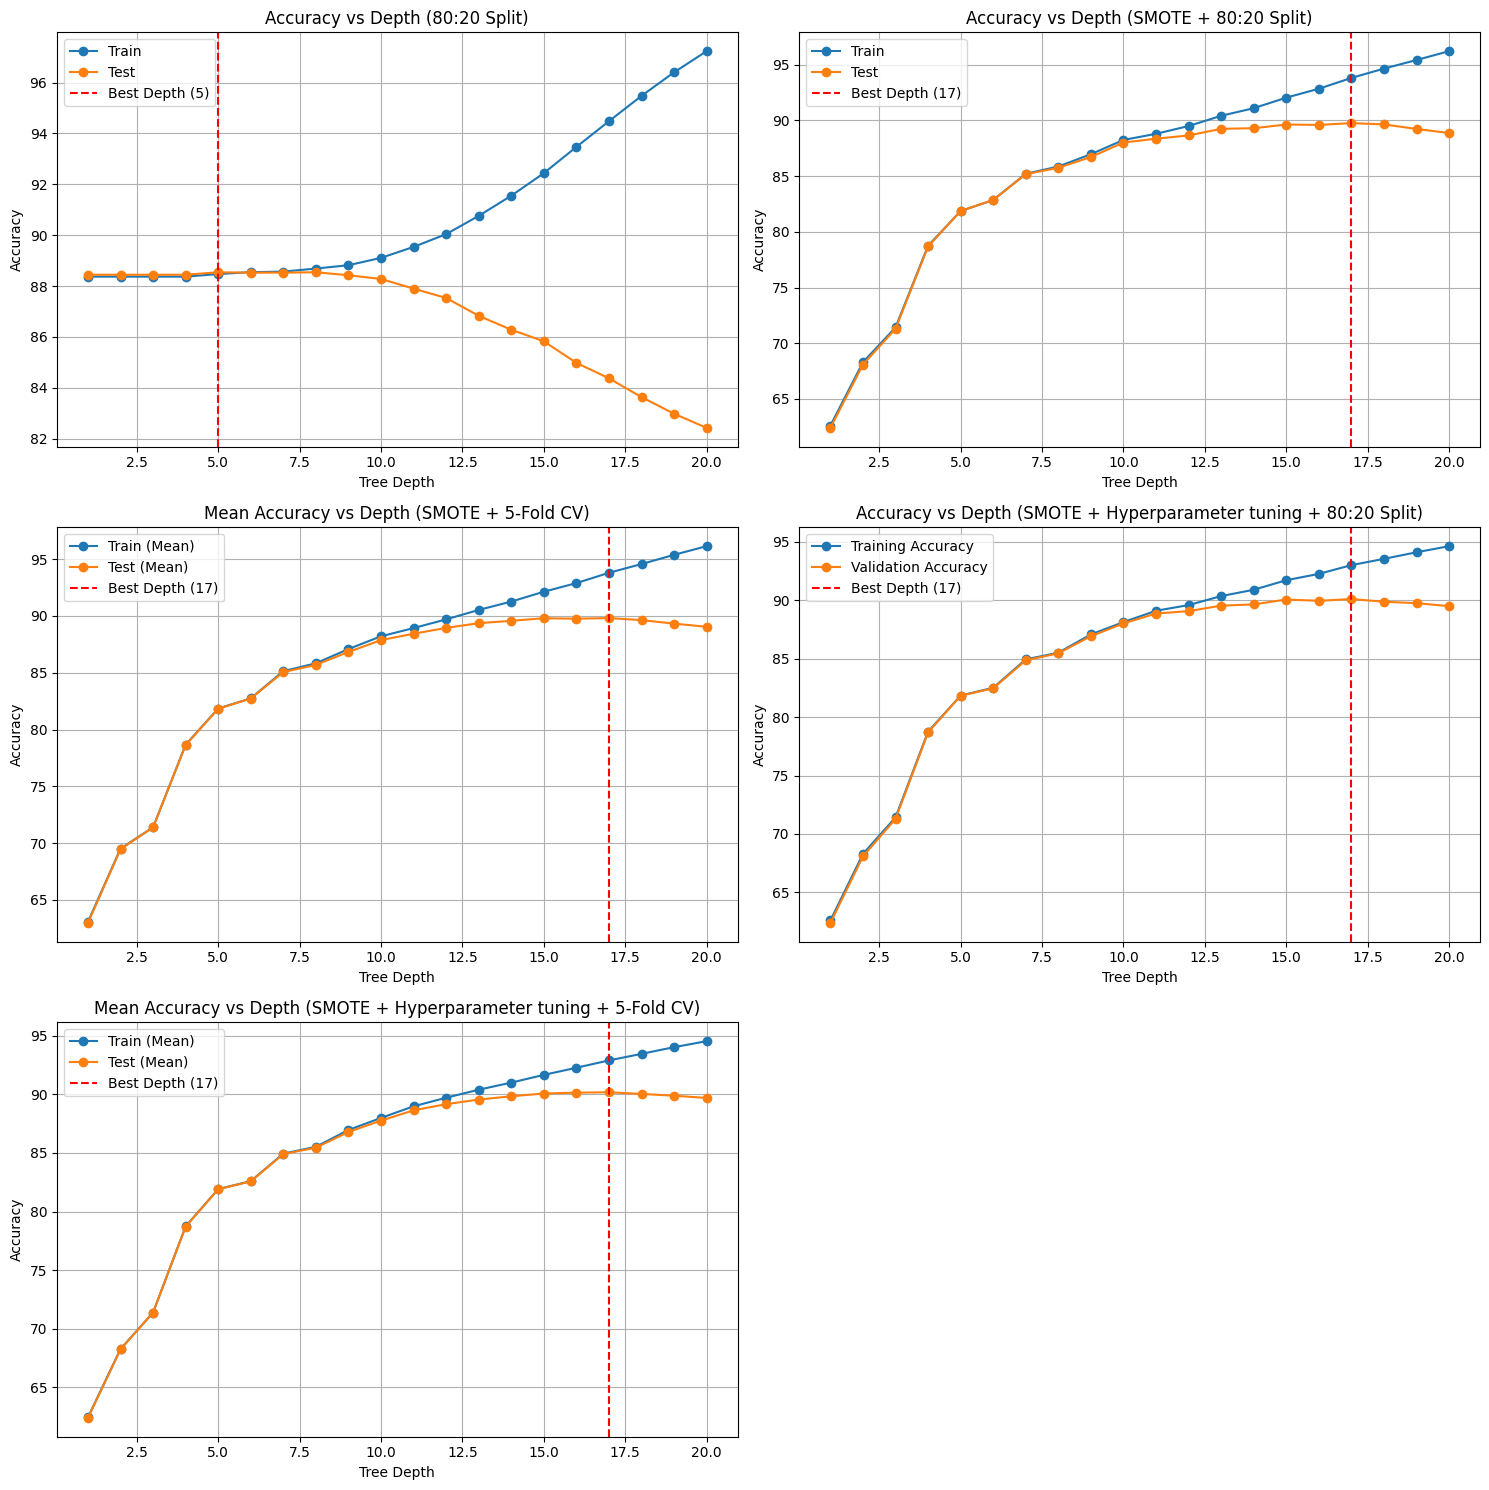

In [68]:
# ---------- Visualisasi Grafik ----------
graphics = [
    ('Accuracy vs Depth (80:20 Split)', values1, train_scores1, test_scores1, best_depth1, 'Train', 'Test'),
    ('Accuracy vs Depth (SMOTE + 80:20 Split)', values2, train_scores2, test_scores2, best_depth2, 'Train', 'Test'),
    ('Mean Accuracy vs Depth (SMOTE + 5-Fold CV)', values3, mean_train_scores3, mean_test_scores3, best_depth3, 'Train (Mean)', 'Test (Mean)'),
    ('Accuracy vs Depth (SMOTE + Hyperparameter tuning + 80:20 Split)', tree_depths, train_accuracies, val_accuracies, best_depth4, 'Training Accuracy', 'Validation Accuracy'),
    ('Mean Accuracy vs Depth (SMOTE + Hyperparameter tuning + 5-Fold CV)', values5, mean_train_scores5, mean_test_scores5, best_depth5, 'Train (Mean)', 'Test (Mean)')
]

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, (title, x, y1, y2, n_best, label1, label2) in enumerate(graphics):
    axes[i].plot(x, y1, '-o', label=label1)
    axes[i].plot(x, y2, '-o', label=label2)
    axes[i].axvline(x=n_best, color='red', linestyle='--', label=f'Best Depth ({n_best})')  # Garis vertikal
    axes[i].set_title(title)
    axes[i].set_xlabel('Tree Depth')
    axes[i].set_ylabel('Accuracy')
    axes[i].legend()
    axes[i].grid(True)

# Kosongkan grafik jika jumlah subplot lebih banyak
for j in range(len(graphics), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [69]:
# Data grafik yang akan disimpan
graphics = [
    ('Accuracy vs Depth (80:20 Split)', values1, train_scores1, test_scores1, best_depth1),
    ('Accuracy vs Depth (SMOTE + 80:20 Split)', values2, train_scores2, test_scores2, best_depth2),
    ('Mean Accuracy vs Depth (SMOTE + 5-Fold CV)', values3, mean_train_scores3, mean_test_scores3, best_depth3),
    ('Accuracy vs Depth (SMOTE + Hyperparameter tuning + 80:20 Split)', tree_depths, train_accuracies, val_accuracies, best_depth4),
    ('Mean Accuracy vs Depth (SMOTE + Hyperparameter tuning + 5-Fold CV)', values5, mean_train_scores5, mean_test_scores5, best_depth5)
]

# Konversi data grafik ke dalam DataFrame
data_graphics = pd.DataFrame({
    "Title": [item[0] for item in graphics],
    "Values": [item[1] for item in graphics],
    "Train Scores": [item[2] for item in graphics],
    "Test Scores": [item[3] for item in graphics],
    "Best Depth": [item[4] for item in graphics]
})

# Simpan ke dalam file CSV lokal
file_path = "D:\KULIAH\SEMESTER 7\SKRIPSI\File Code/line_chart_df.csv"
data_graphics.to_csv(file_path, index=False)
data_graphics.head()

,Title,Values,Train Scores,Test Scores,Best Depth
0,Accuracy vs Depth (80:20 Split),"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[88.37216132995883, 88.37216132995883, 88.3721...","[88.44722929312708, 88.44722929312708, 88.4472...",5
1,Accuracy vs Depth (SMOTE + 80:20 Split),"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[62.60336185649802, 68.29304090166431, 71.4170...","[62.398369480936665, 68.08746316932142, 71.292...",17
2,Mean Accuracy vs Depth (SMOTE + 5-Fold CV),"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[63.06719483719618, 69.5172442172294, 71.39201...","[62.97930009092292, 69.47061167811792, 71.3915...",17
3,Accuracy vs Depth (SMOTE + Hyperparameter tuni...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[62.60336185649802, 68.29304090166431, 71.4170...","[62.398369480936665, 68.08746316932142, 71.292...",17
4,Mean Accuracy vs Depth (SMOTE + Hyperparameter...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[62.45137240220013, 68.27994980967034, 71.3920...","[62.40861427889115, 68.25015305231493, 71.3913...",17


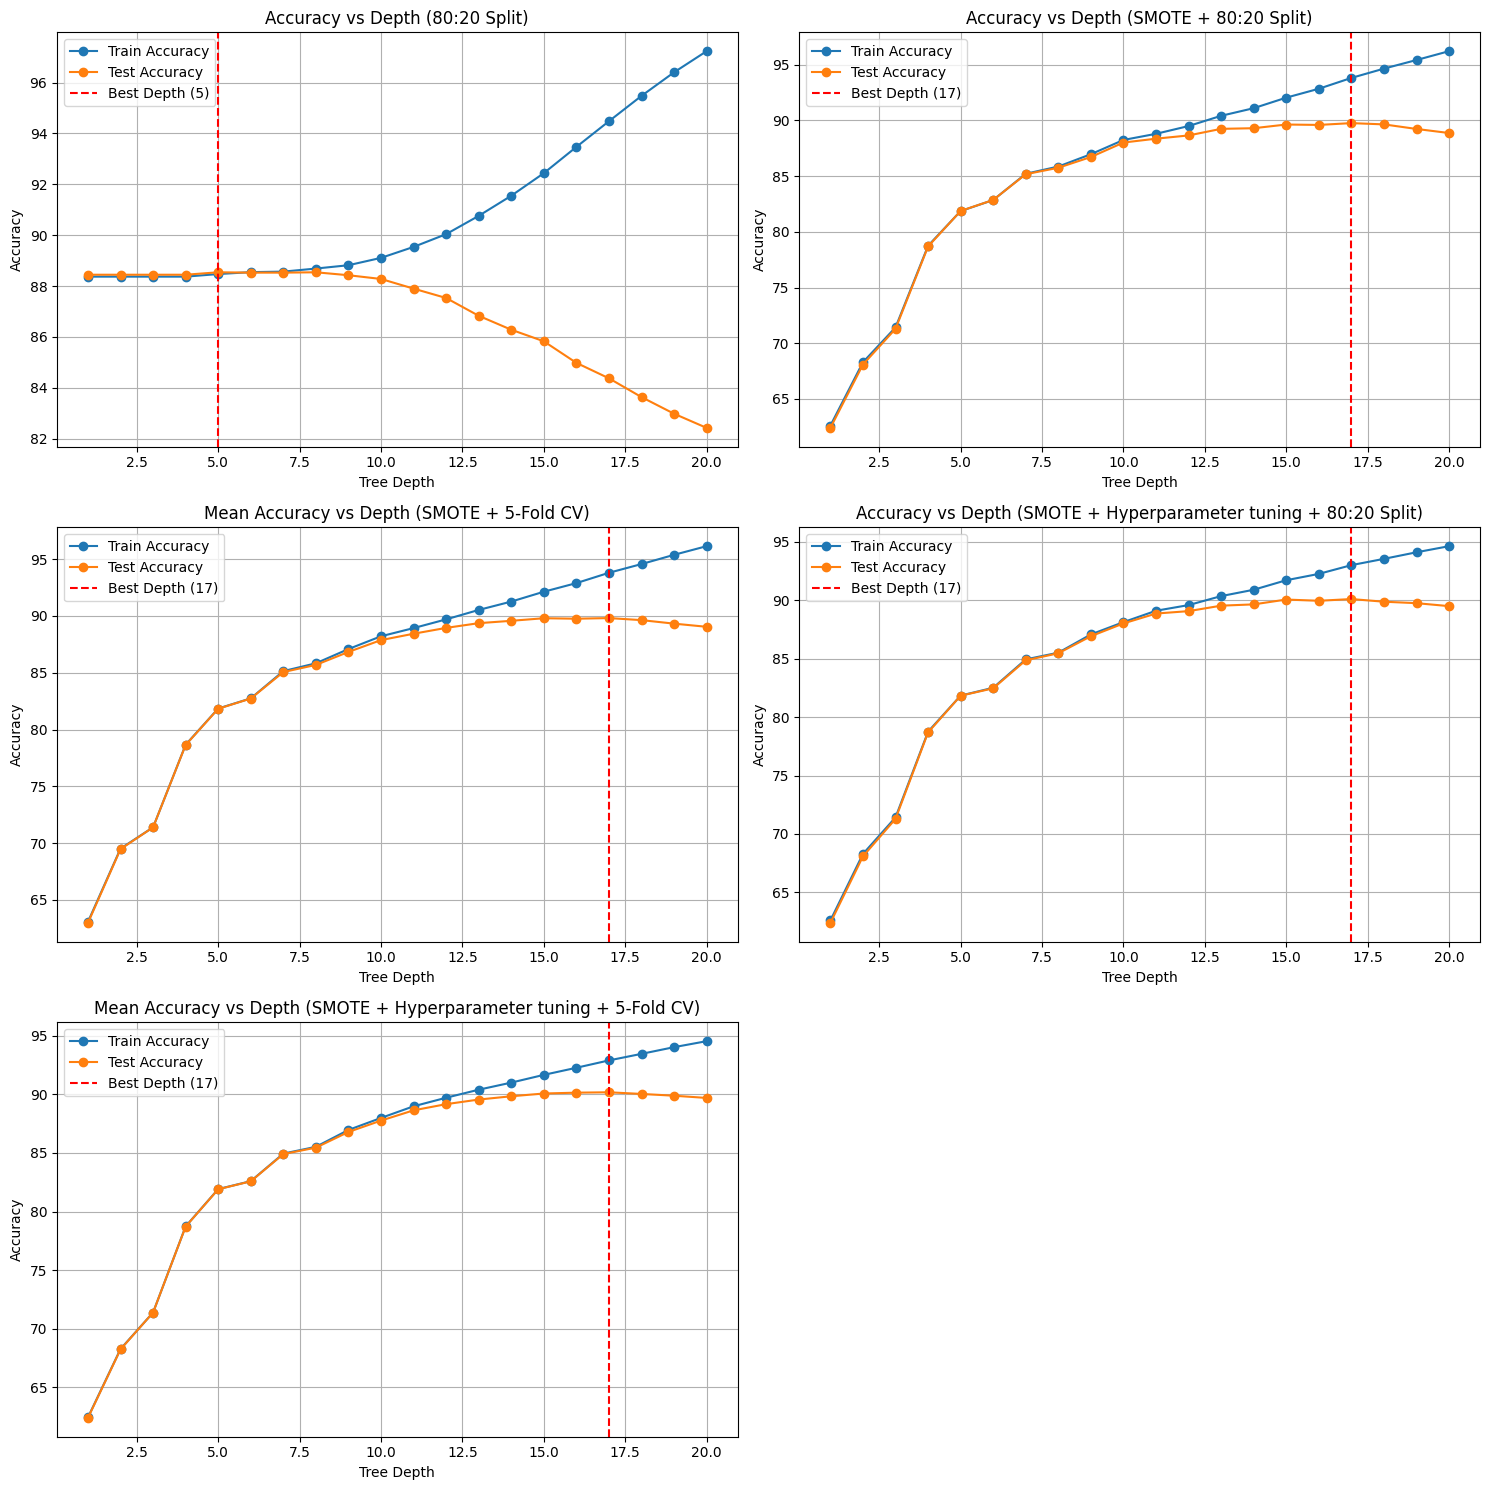

In [70]:
file_path = 'D:\KULIAH\SEMESTER 7\SKRIPSI\File Code/line_chart_df.csv'  # Ganti dengan path file yang benar
data_graphics = pd.read_csv(file_path)

# 2. Konversi kolom yang bertipe string ke dalam list Python
def safe_convert_to_list(column):
    converted = []
    for value in column:
        try:
            converted.append(ast.literal_eval(value))
        except Exception:
            converted.append([])  # Jika gagal, isi dengan list kosong
    return converted

# Terapkan ke kolom-kolom yang dibutuhkan
data_graphics['Values'] = safe_convert_to_list(data_graphics['Values'])
data_graphics['Train Scores'] = safe_convert_to_list(data_graphics['Train Scores'])
data_graphics['Test Scores'] = safe_convert_to_list(data_graphics['Test Scores'])

# 3. Persiapan data untuk visualisasi
graphics = [
    (
        row['Title'], 
        row['Values'], 
        row['Train Scores'], 
        row['Test Scores'], 
        row['Best Depth'], 
        "Train Accuracy", 
        "Test Accuracy"
    )
    for _, row in data_graphics.iterrows()
]

# 4. Visualisasi menggunakan Matplotlib
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, (title, x, y1, y2, n_best, label1, label2) in enumerate(graphics):
    axes[i].plot(x, y1, '-o', label=label1)
    axes[i].plot(x, y2, '-o', label=label2)
    axes[i].axvline(x=n_best, color='red', linestyle='--', label=f'Best Depth ({n_best})')  # Garis vertikal
    axes[i].set_title(title)
    axes[i].set_xlabel('Tree Depth')
    axes[i].set_ylabel('Accuracy')
    axes[i].legend()
    axes[i].grid(True)

# Kosongkan grafik jika jumlah subplot lebih banyak dari data
for j in range(len(graphics), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# **Bar Plot Evaluasi**

In [61]:
# Data untuk bar plot dengan tambahan metrik
data_akurasi_secara_report = {
    'Configuration': [
        '80:20 Split',
        'SMOTE + 80:20 Split',
        'SMOTE + 5-Fold CV',
        'SMOTE + Hyperparameter Tuning + 80:20 Split',
        'SMOTE + Hyperparameter Tuning + 5-Fold CV'
    ],
    'Train Accuracy (%)': [
        train_accuracy_1 * 100,
        train_accuracy_2 * 100,
        mean_train_accuracy_3 * 100,
        train_acc_4 * 100,
        mean_train_accuracy_5 * 100
    ],
    'Test Accuracy (%)': [
        test_accuracy_1 * 100,
        test_accuracy_2 * 100,
        mean_test_accuracy_3 * 100,
        test_acc_4 * 100,
        mean_test_accuracy_5 * 100
    ],
    'Train Precision (%)': [
        train_precision_1 * 100,
        train_precision_2 * 100,
        mean_train_precision_3 * 100,
        train_precision_4 * 100,
        mean_train_precision_5 * 100
    ],
    'Test Precision (%)': [
        test_precision_1 * 100,
        test_precision_2 * 100,
        mean_test_precision_3 * 100,
        test_precision_4 * 100,
        mean_test_precision_5 * 100
    ],
    'Train Recall (%)': [
        train_recall_1 * 100,
        train_recall_2 * 100,
        mean_train_recall_3 * 100,
        train_recall_4 * 100,
        mean_train_recall_5 * 100
    ],
    'Test Recall (%)': [
        test_recall_1 * 100,
        test_recall_2 * 100,
        mean_test_recall_3 * 100,
        test_recall_4 * 100,
        mean_test_recall_5 * 100
    ],
    'Train F1-Score (%)': [
        train_f1_1 * 100,
        train_f1_2 * 100,
        mean_train_f1_score_3 * 100,
        train_f1_4 * 100,
        mean_train_f1_score_5 * 100
    ],
    'Test F1-Score (%)': [
        test_f1_1 * 100,
        test_f1_2 * 100,
        mean_test_f1_score_3 * 100,
        test_f1_4 * 100,
        mean_test_f1_score_5 * 100
    ]
}

# Konversi ke DataFrame
bar_plot_df = pd.DataFrame(data_akurasi_secara_report)

# Simpan ke file lokal sebagai CSV
file_path = "D:\KULIAH\SEMESTER 7\SKRIPSI\File Code/bar_plot_df.csv"
bar_plot_df.to_csv(file_path, index=False)
bar_plot_df.head(6)

,Configuration,Train Accuracy (%),Test Accuracy (%),Train Precision (%),Test Precision (%),Train Recall (%),Test Recall (%),Train F1-Score (%),Test F1-Score (%)
0,80:20 Split,100.000000,80.383787,100.000000,81.814523,100.000000,80.383787,100.000000,81.071069
1,SMOTE + 80:20 Split,100.000000,87.417754,100.000000,87.435580,100.000000,87.417754,100.000000,87.416213
2,SMOTE + 5-Fold CV,100.000000,87.635471,100.000000,87.649483,100.000000,87.635633,100.000000,87.634251
3,SMOTE + Hyperparameter Tuning + 80:20 Split,92.989117,90.056271,93.472753,90.523013,92.988766,90.057698,92.969524,90.027785
4,SMOTE + Hyperparameter Tuning + 5-Fold CV,94.530482,89.703315,94.753687,89.902037,94.530481,89.703409,94.523649,89.690423


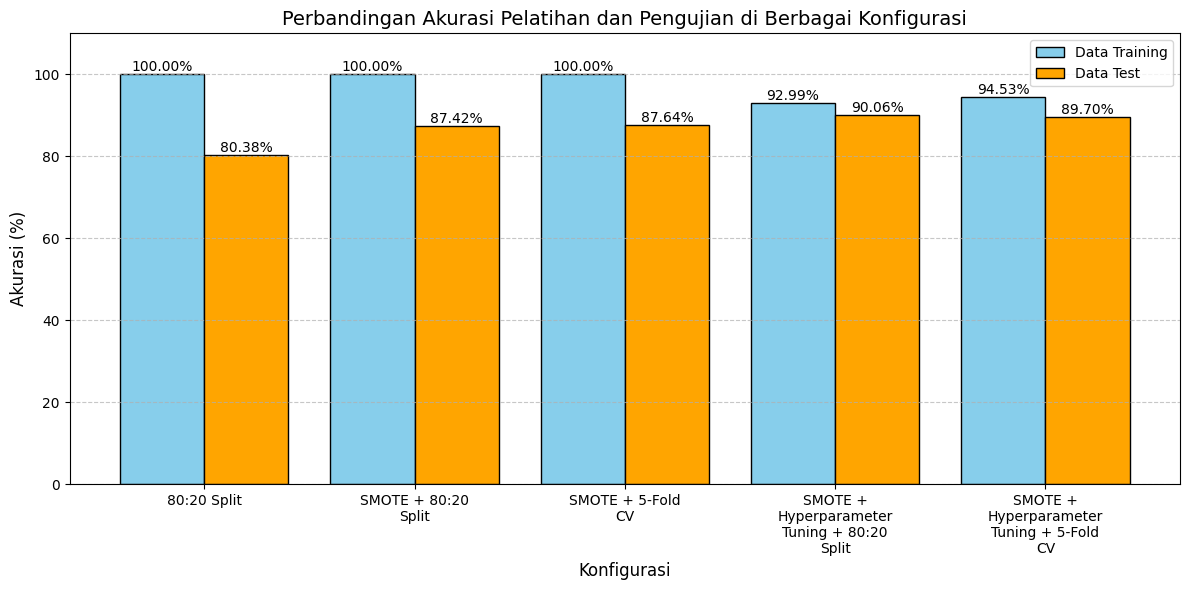

In [63]:
# Data untuk bar plot (dari masing-masing grafik sebelumnya)
bar_plot_data = [
    ('80:20 Split', train_accuracy_1 * 100, test_accuracy_1 * 100),
    ('SMOTE + 80:20 Split', train_accuracy_2 * 100, test_accuracy_2 * 100),
    ('SMOTE + 5-Fold CV', mean_train_accuracy_3 * 100, mean_test_accuracy_3 * 100),
    ('SMOTE + Hyperparameter Tuning + 80:20 Split', train_acc_4 * 100, test_acc_4 * 100),
    ('SMOTE + Hyperparameter Tuning + 5-Fold CV', mean_train_accuracy_5 * 100, mean_test_accuracy_5 * 100)
]

# Ekstrak label, nilai akurasi (training dan test)
labels = [item[0] for item in bar_plot_data]
train_accuracies = [item[1] for item in bar_plot_data]
test_accuracies = [item[2] for item in bar_plot_data]

# Wrap label agar menjadi multi-line
wrapped_labels = ['\n'.join(wrap(label, width=15)) for label in labels]

# Posisi batang (grup bar)
x = np.arange(len(labels))  # Posisi pada sumbu X
bar_width = 0.4  # Lebar batang

# Membuat bar plot
plt.figure(figsize=(12, 6))
bars_train = plt.bar(x - bar_width / 2, train_accuracies, width=bar_width, color='skyblue', edgecolor='black', label='Data Training')
bars_test = plt.bar(x + bar_width / 2, test_accuracies, width=bar_width, color='orange', edgecolor='black', label='Data Test')

# Tambahkan nilai akurasi di atas setiap bar
for i, (bar_train, bar_test) in enumerate(zip(bars_train, bars_test)):
    plt.text(bar_train.get_x() + bar_train.get_width() / 2, bar_train.get_height(),
             f'{train_accuracies[i]:.2f}%', ha='center', va='bottom', fontsize=10)
    plt.text(bar_test.get_x() + bar_test.get_width() / 2, bar_test.get_height(),
             f'{test_accuracies[i]:.2f}%', ha='center', va='bottom', fontsize=10)

# Menambahkan judul, label sumbu, dan grid
plt.title('Perbandingan Akurasi Pelatihan dan Pengujian di Berbagai Konfigurasi', fontsize=14)
plt.xlabel('Konfigurasi', fontsize=12)
plt.ylabel('Akurasi (%)', fontsize=12)
plt.ylim(0, 110)  # Rentang sumbu Y
plt.xticks(x, wrapped_labels, fontsize=10)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan plot
plt.tight_layout()
plt.show()

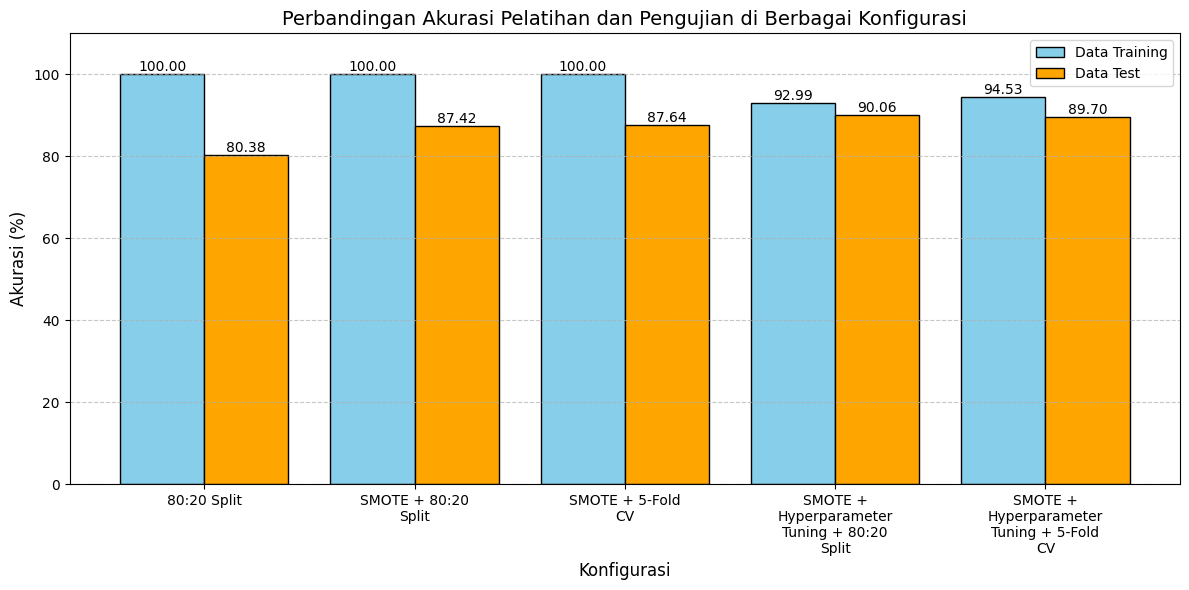

In [ ]:
# Ekstrak label dan nilai akurasi dari dataset
labels = bar_plot_df['Configuration'].tolist()
train_accuracies = bar_plot_df['Train Accuracy (%)'].tolist()
test_accuracies = bar_plot_df['Test Accuracy (%)'].tolist()

# Wrap label agar menjadi multi-line
wrapped_labels = ['\n'.join(wrap(label, width=15)) for label in labels]

# Posisi batang (grup bar)
x = np.arange(len(labels))  # Posisi pada sumbu X
bar_width = 0.4  # Lebar batang

# Membuat bar plot
plt.figure(figsize=(12, 6))
bars_train = plt.bar(x - bar_width / 2, train_accuracies, width=bar_width, color='skyblue', edgecolor='black', label='Data Training')
bars_test = plt.bar(x + bar_width / 2, test_accuracies, width=bar_width, color='orange', edgecolor='black', label='Data Test')

# Tambahkan nilai akurasi di atas setiap bar
for i, (bar_train, bar_test) in enumerate(zip(bars_train, bars_test)):
    plt.text(bar_train.get_x() + bar_train.get_width() / 2, bar_train.get_height(),
             f'{train_accuracies[i]:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(bar_test.get_x() + bar_test.get_width() / 2, bar_test.get_height(),
             f'{test_accuracies[i]:.2f}', ha='center', va='bottom', fontsize=10)

# Menambahkan judul, label sumbu, dan grid
plt.title('Perbandingan Akurasi Pelatihan dan Pengujian di Berbagai Konfigurasi', fontsize=14)
plt.xlabel('Konfigurasi', fontsize=12)
plt.ylabel('Akurasi (%)', fontsize=12)
plt.ylim(0, 110)  # Rentang sumbu Y
plt.xticks(x, wrapped_labels, fontsize=10)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan plot
plt.tight_layout()
plt.show()

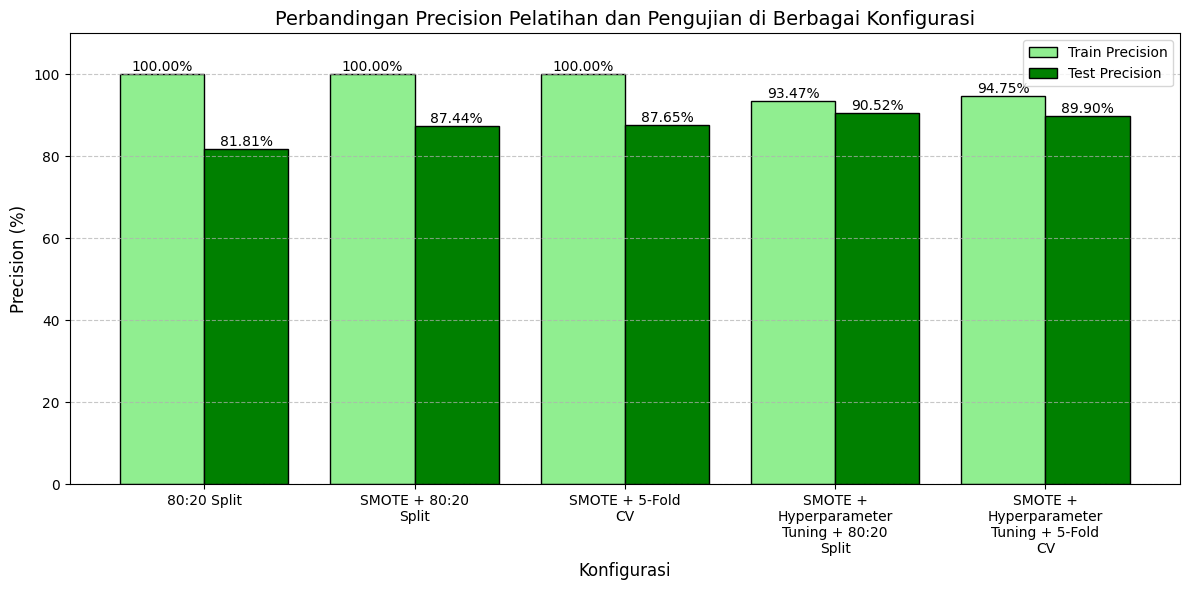

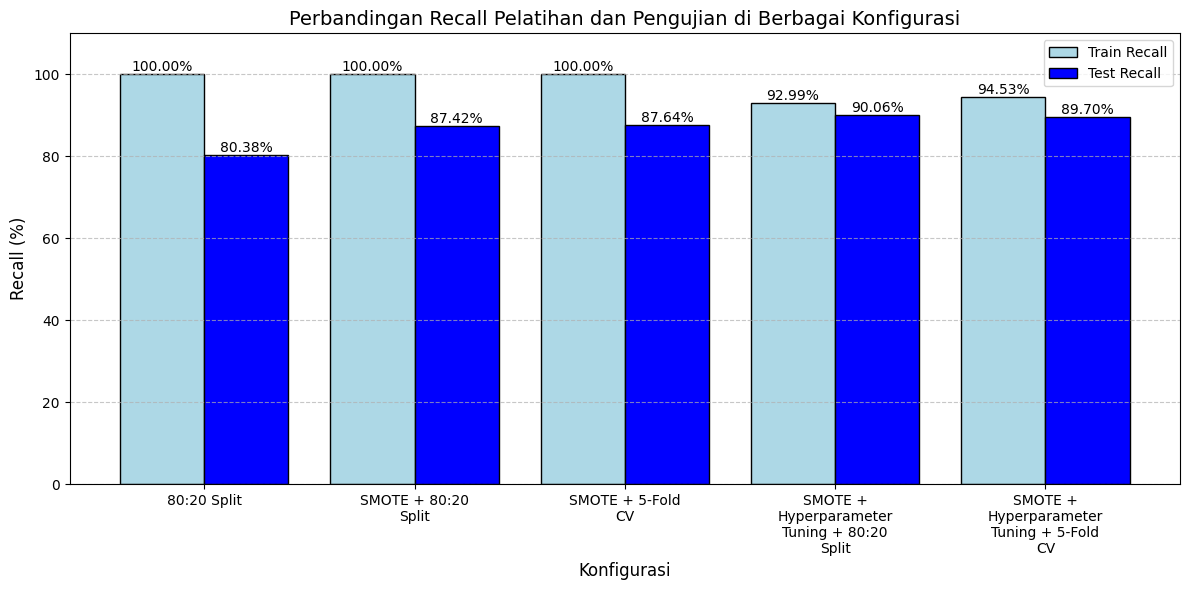

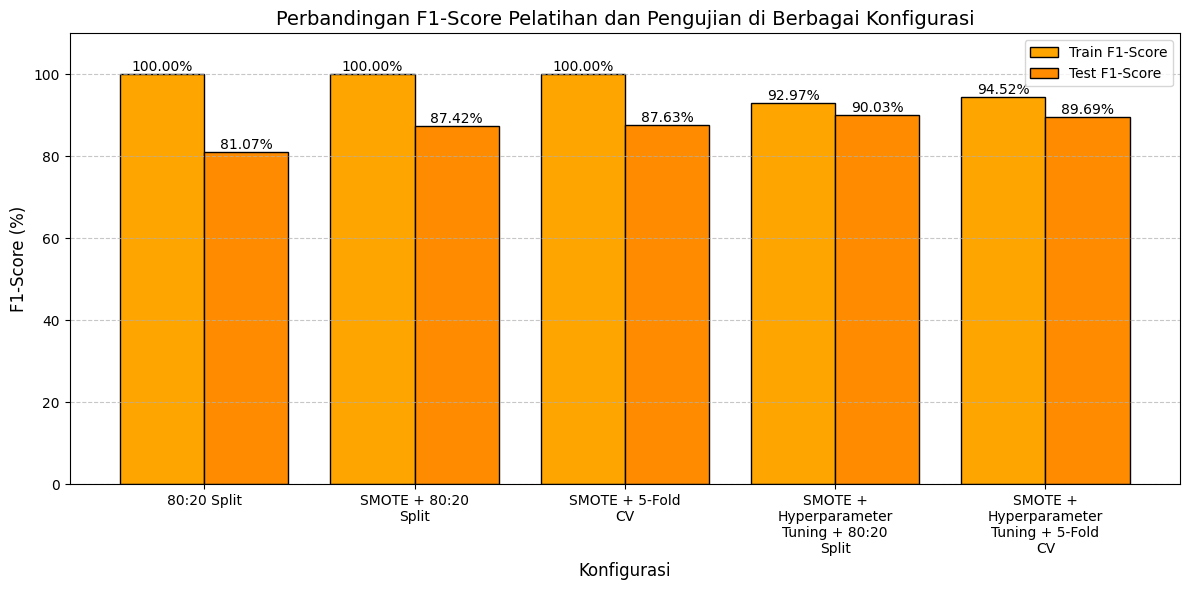

In [ ]:
# Ekstrak label dan nilai metrik
labels = bar_plot_df['Configuration'].tolist()
train_precisions = bar_plot_df['Train Precision (%)'].tolist()
test_precisions = bar_plot_df['Test Precision (%)'].tolist()
train_recalls = bar_plot_df['Train Recall (%)'].tolist()
test_recalls = bar_plot_df['Test Recall (%)'].tolist()
train_f1_scores = bar_plot_df['Train F1-Score (%)'].tolist()
test_f1_scores = bar_plot_df['Test F1-Score (%)'].tolist()

# Wrap label agar menjadi multi-line
wrapped_labels = ['\n'.join(wrap(label, width=15)) for label in labels]

# Posisi batang (grup bar)
x = np.arange(len(labels))  # Posisi pada sumbu X
bar_width = 0.4  # Lebar batang

# Precision Plot
plt.figure(figsize=(12, 6))
bars_train_precision = plt.bar(x - bar_width / 2, train_precisions, width=bar_width, color='lightgreen', edgecolor='black', label='Train Precision')
bars_test_precision = plt.bar(x + bar_width / 2, test_precisions, width=bar_width, color='green', edgecolor='black', label='Test Precision')
for i, bar in enumerate(bars_train_precision):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{train_precisions[i]:.2f}%', ha='center', va='bottom', fontsize=10)
for i, bar in enumerate(bars_test_precision):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{test_precisions[i]:.2f}%', ha='center', va='bottom', fontsize=10)
plt.title('Perbandingan Precision Pelatihan dan Pengujian di Berbagai Konfigurasi', fontsize=14)
plt.xlabel('Konfigurasi', fontsize=12)
plt.ylabel('Precision (%)', fontsize=12)
plt.ylim(0, 110)
plt.xticks(x, wrapped_labels, fontsize=10)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Recall Plot
plt.figure(figsize=(12, 6))
bars_train_recall = plt.bar(x - bar_width / 2, train_recalls, width=bar_width, color='lightblue', edgecolor='black', label='Train Recall')
bars_test_recall = plt.bar(x + bar_width / 2, test_recalls, width=bar_width, color='blue', edgecolor='black', label='Test Recall')
for i, bar in enumerate(bars_train_recall):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{train_recalls[i]:.2f}%', ha='center', va='bottom', fontsize=10)
for i, bar in enumerate(bars_test_recall):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{test_recalls[i]:.2f}%', ha='center', va='bottom', fontsize=10)
plt.title('Perbandingan Recall Pelatihan dan Pengujian di Berbagai Konfigurasi', fontsize=14)
plt.xlabel('Konfigurasi', fontsize=12)
plt.ylabel('Recall (%)', fontsize=12)
plt.ylim(0, 110)
plt.xticks(x, wrapped_labels, fontsize=10)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# F1-Score Plot
plt.figure(figsize=(12, 6))
bars_train_f1 = plt.bar(x - bar_width / 2, train_f1_scores, width=bar_width, color='orange', edgecolor='black', label='Train F1-Score')
bars_test_f1 = plt.bar(x + bar_width / 2, test_f1_scores, width=bar_width, color='darkorange', edgecolor='black', label='Test F1-Score')
for i, bar in enumerate(bars_train_f1):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{train_f1_scores[i]:.2f}%', ha='center', va='bottom', fontsize=10)
for i, bar in enumerate(bars_test_f1):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{test_f1_scores[i]:.2f}%', ha='center', va='bottom', fontsize=10)
plt.title('Perbandingan F1-Score Pelatihan dan Pengujian di Berbagai Konfigurasi', fontsize=14)
plt.xlabel('Konfigurasi', fontsize=12)
plt.ylabel('F1-Score (%)', fontsize=12)
plt.ylim(0, 110)
plt.xticks(x, wrapped_labels, fontsize=10)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.show()